<div style="text-align: justify">
<font size=6><br>
<h4 align="center">Estadística II</h4></font><font size=5><h4 align="center">Grupo F1</h4></font> 

<font size=5><h4 align="left">Intregrantes: </h4></font>      
2172016 - Kevin Javier Lozano Galvis<br><br>
2170688 - Brayan Rodolfo Barajas Ochoa<br><br>
2160090 - Kevin Joel Dlaikan Castillo<br> 
    
<font size=5><h4 align="center">Ejercicio Series de Tiempo</h4></font>  

Use los datos de COVID - 19 en Colombia para hacer el análisis de series de tiempo. La tabla la encuentra en https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data o ya generada en https://www.dropbox.com/s/6zhlsye308tikf9/covid_19.csv?dl=0
Compare los casos mediante Fecha de Notificación, Fecha de Diagnóstico, etc.

In [19]:
library(pracma)
library(forecast)
library(readr)
library(padr)
library(dplyr) # for the pipe operator

In [4]:
covid_19 <- read_csv("https://www.dropbox.com/s/6zhlsye308tikf9/covid_19.csv?dl=1")

Parsed with column specification:
cols(
  .default = col_character(),
  `ID de caso` = col_double(),
  `Fecha de notificación` = col_datetime(format = ""),
  Edad = col_double(),
  `Fecha de muerte` = col_datetime(format = ""),
  `Fecha diagnostico` = col_datetime(format = ""),
  `Fecha recuperado` = col_datetime(format = ""),
  `fecha reporte web` = col_datetime(format = ""),
  `Codigo departamento` = col_double(),
  `Codigo pais` = col_double()
)

See spec(...) for full column specifications.



In [5]:
head(covid_19)

ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,...,2020-02-27T00:00:00.000,NA,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NA
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,...,2020-03-04T00:00:00.000,NA,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NA
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,...,2020-02-29T00:00:00.000,NA,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NA
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,...,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,...,2020-03-08T00:00:00.000,NA,2020-03-11,2020-03-23,2020-03-11,PCR,5,NA,Otro,NA
6,2020-03-10,05360,Itagüí,Antioquia,Recuperado,27,F,Relacionado,Leve,...,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA


In [6]:
dim(covid_19)

[1] 276055     21

Como en la clase se trabajó con Fecha de notificación, se intentará determinar series de tiempo para fecha de diagnóstivo, fecha recuperado y fecha de inicio de síntomas

In [7]:
covid_19$'Fecha diagnostico' <- as.Date(covid_19$'Fecha diagnostico')
covid_19$'Fecha recuperado' <- as.Date(covid_19$'Fecha recuperado')
covid_19$'FIS' <- as.Date(covid_19$'FIS')
covid_19$'Fecha de notificación' <- as.Date(covid_19$'Fecha de notificación')

In [14]:
unique(covid_19$'Fecha diagnostico')

[1] "2020-03-06" "2020-03-09" "2020-03-11" "2020-03-12" "2020-03-13"
  [6] "2020-03-14" "2020-03-15" "2020-03-16" "2020-03-17" "2020-03-18"
 [11] "2020-03-19" "2020-03-20" "2020-03-21" "2020-03-22" "2020-03-23"
 [16] "2020-03-24" "2020-03-27" "2020-03-25" "2020-03-26" "2020-03-28"
 [21] "2020-03-29" "2020-03-30" "2020-03-31" "2020-04-01" "2020-04-02"
 [26] "2020-04-03" "2020-04-04" "2020-04-05" "2020-04-06" "2020-04-07"
 [31] "2020-04-08" "2020-04-09" "2020-04-10" "2020-04-11" "2020-04-12"
 [36] "2020-04-13" "2020-04-14" "2020-04-19" "2020-04-15" "2020-04-28"
 [41] "2020-04-16" "2020-04-17" "2020-04-18" "2020-04-20" "2020-04-22"
 [46] "2020-04-21" "2020-04-23" "2020-05-01" "2020-04-24" "2020-05-05"
 [51] "2020-04-25" "2020-04-26" "2020-04-27" "2020-04-29" "2020-04-30"
 [56] "2020-05-02" "2020-05-04" "2020-05-03" NA           "2020-05-06"
 [61] "2020-05-07" "2020-05-08" "2020-05-09" "2020-05-10" "2020-05-11"
 [66] "2020-05-12" "2020-05-13" "2020-07-05" "2020-05-14" "2020-05-15"
 [71] "2020-05-16" "2020-05-17" "2020-05-18" "2020-05-19" "2020-05-20"
 [76] "2020-05-29" "2020-05-21" "2020-05-22" "2020-07-07" "2020-05-23"
 [81] "2020-06-01" "2020-05-24" "2020-05-25" "2020-05-26" "2020-05-27"
 [86] "2020-05-28" "2020-05-30" "2020-05-31" "2020-06-03" "2020-06-02"
 [91] "2020-06-05" "2020-06-04" "2020-06-06" "2020-06-07" "2020-06-26"
 [96] "2020-06-08" "2020-06-28" "2020-06-09" "2020-06-10" "2020-06-11"
[101] "2020-06-12" "2020-06-16" "2020-06-13" "2020-06-14" "2020-07-19"
[106] "2020-06-15" "2020-06-17" "2020-06-20" "2020-07-17" "2020-06-25"
[111] "2020-06-18" "2020-06-23" "2020-06-19" "2020-07-02" "2020-06-21"
[116] "2020-07-04" "2020-07-01" "2020-06-29" "2020-06-30" "2020-07-16"
[121] "2020-07-03" "2020-06-22" "2020-06-24" "2020-07-11" "2020-07-09"
[126] "2020-07-08" "2020-06-27" "2020-07-14" "2020-07-18" "2020-07-06"
[131] "2020-07-10" "2020-07-12" "2020-07-13" "2020-07-15" "2020-07-24"
[136] "2020-07-20" "2020-07-21" "2020-07-22" "2020-07-26" "2020-07-23"
[141] "2020-07-25" "2020-07-27" "2020-07-29" "2020-07-28"

In [9]:
unique(covid_19$'Fecha recuperado')

[1] "2020-03-13" "2020-03-19" "2020-03-15" "2020-03-26" "2020-03-23"
  [6] "2020-03-17" "2020-03-21" "2020-03-31" "2020-04-09" "2020-03-30"
 [11] "2020-03-14" "2020-04-07" "2020-03-24" "2020-04-10" "2020-03-27"
 [16] "2020-05-12" "2020-03-25" "2020-04-08" "2020-04-21" "2020-03-28"
 [21] "2020-03-22" "2020-04-05" "2020-05-14" "2020-05-31" "2020-04-02"
 [26] "2020-03-20" "2020-04-12" "2020-04-01" "2020-04-15" "2020-03-29"
 [31] "2020-05-04" "2020-04-25" "2020-04-19" "2020-04-14" "2020-04-13"
 [36] "2020-05-06" "2020-04-23" "2020-05-24" "2020-04-24" "2020-04-18"
 [41] "2020-04-04" "2020-05-08" "2020-04-03" "2020-05-03" "2020-04-11"
 [46] NA           "2020-04-16" "2020-04-06" "2020-04-17" "2020-05-15"
 [51] "2020-05-05" "2020-04-20" "2020-05-18" "2020-06-09" "2020-05-13"
 [56] "2020-04-27" "2020-04-29" "2020-04-22" "2020-04-28" "2020-04-30"
 [61] "2020-05-07" "2020-07-11" "2020-05-01" "2020-05-19" "2020-05-21"
 [66] "2020-05-02" "2020-06-06" "2020-06-23" "2020-06-28" "2020-07-19"
 [71] "2020-05-11" "2020-04-26" "2020-06-24" "2020-06-07" "2020-05-09"
 [76] "2020-05-30" "2020-05-27" "2020-06-11" "2020-07-02" "2020-06-30"
 [81] "2020-06-12" "2020-06-10" "2020-05-16" "2020-05-10" "2020-05-22"
 [86] "2020-05-17" "2020-05-20" "2020-06-16" "2020-05-29" "2020-06-01"
 [91] "2020-06-03" "2020-06-26" "2020-07-01" "2020-05-25" "2020-07-13"
 [96] "2020-05-26" "2020-05-23" "2020-06-04" "2020-05-28" "2020-06-25"
[101] "2020-06-02" "2020-06-08" "2020-06-05" "2020-07-14" "2020-06-20"
[106] "2020-06-19" "2020-06-14" "2020-06-13" "2020-06-29" "2020-06-18"
[111] "2020-07-24" "2020-07-10" "2020-07-04" "2020-07-08" "2020-07-05"
[116] "2020-07-09" "2020-07-03" "2020-07-07" "2020-07-06" "2020-07-25"
[121] "2020-07-16" "2020-07-17" "2020-07-28" "2020-06-22" "2020-07-23"
[126] "2020-07-27" "2020-07-26" "2020-07-15" "2020-06-17" "2020-06-27"
[131] "2020-06-21" "2020-07-21" "2020-07-12" "2020-07-22" "2020-07-18"
[136] "2020-06-15" "2020-07-20" "2020-07-29"

In [10]:
unique(covid_19$'FIS')

[1] "2020-02-27" "2020-03-04" "2020-02-29" "2020-03-06" "2020-03-08"
  [6] "2020-03-02" "2020-03-07" "2020-03-09" "2020-02-28" "2020-03-10"
 [11] "2020-03-12" NA           "2020-03-11" "2020-03-13" "2020-03-05"
 [16] "2020-03-14" "2020-03-15" "2020-03-16" "2020-03-18" "2020-03-17"
 [21] "2020-03-19" "2020-03-20" "2020-03-21" "2020-03-22" "2020-03-23"
 [26] "2020-03-24" "2020-03-25" "2020-03-27" "2020-03-26" "2020-03-28"
 [31] "2020-03-29" "2020-03-01" "2020-03-30" "2020-03-31" "2020-04-01"
 [36] "2020-04-03" "2020-04-02" "2020-04-04" "2020-04-05" "2020-04-06"
 [41] "2020-04-07" "2020-04-09" "2020-04-10" "2020-04-08" "2020-04-11"
 [46] "2020-04-12" "2020-04-13" "2020-04-23" "2020-04-14" "2020-04-15"
 [51] "2020-04-17" "2020-04-16" "2020-04-18" "2020-04-19" "2020-04-20"
 [56] "2020-04-26" "2020-04-21" "2020-04-29" "2020-04-22" "2020-04-25"
 [61] "2020-04-24" "2020-04-27" "2020-04-28" "2020-04-30" "2020-05-02"
 [66] "2020-05-01" "2020-05-22" "2020-05-03" "2020-05-06" "2020-05-05"
 [71] "2020-05-04" "2020-05-07" "2020-03-03" "2020-05-09" "2020-05-08"
 [76] "2020-06-25" "2020-05-10" "2020-05-11" "2020-06-21" "2020-05-12"
 [81] "2020-05-13" "2020-05-14" "2020-05-15" "2020-05-16" "2020-05-17"
 [86] "2020-05-23" "2020-05-18" "2020-05-19" "2020-05-20" "2020-06-23"
 [91] "2020-05-21" "2020-05-24" "2020-05-25" "2020-05-29" "2020-05-26"
 [96] "2020-05-27" "2020-05-28" "2020-06-03" "2020-05-30" "2020-05-31"
[101] "2020-06-20" "2020-06-01" "2020-06-02" "2020-06-07" "2020-06-04"
[106] "2020-06-05" "2020-06-08" "2020-06-06" "2020-06-09" "2020-06-30"
[111] "2020-06-15" "2020-06-27" "2020-06-10" "2020-06-16" "2020-06-24"
[116] "2020-06-29" "2020-06-11" "2020-06-12" "2020-06-28" "2020-06-13"
[121] "2020-07-01" "2020-06-14" "2020-06-26" "2020-07-04" "2020-07-08"
[126] "2020-06-17" "2020-06-18" "2020-06-19" "2020-06-22" "2020-07-02"
[131] "2020-07-10" "2020-07-03" "2020-07-06" "2020-07-05" "2020-07-07"
[136] "2020-07-09" "2020-07-15" "2020-07-11" "2020-07-12" "2020-07-13"
[141] "2020-07-14" "2020-07-16" "2020-07-17" "2020-07-18" "2020-07-19"
[146] "2020-07-20" "2020-07-21" "2020-07-22" "2020-07-23" "2020-07-24"
[151] "2020-07-25" "2020-07-26" "2020-07-27" "2020-07-28"

Como existen valores "perdidos" o NAs en las 3 fechas, es necesario excluirlos antes de proceder a determinar las series de tiempo

In [36]:
casos.fd <- with(covid_19[!is.na(covid_19$'Fecha diagnostico'),],data.frame(table(`Fecha diagnostico`)))
casos.fr <- with(covid_19[!is.na(covid_19$'Fecha recuperado'),],data.frame(table(`Fecha recuperado`)))
casos.fis <- with(covid_19[!is.na(covid_19$'FIS'),],data.frame(table(`FIS`)))

casos.fd$Fecha.diagnostico <- as.Date(casos.fd$Fecha.diagnostico)
casos.fr$Fecha.recuperado <- as.Date(casos.fr$Fecha.recuperado)
casos.fis$FIS <- as.Date(casos.fis$FIS)
casos.fd <- casos.fd %>% pad
casos.fd$Freq <- replace(casos.fd$Freq,is.na(casos.fd$Freq),0)
casos.fr <- casos.fr %>% pad
casos.fr$Freq <- replace(casos.fr$Freq,is.na(casos.fr$Freq),0)
casos.fis <- casos.fis %>% pad
casos.fis$Freq <- replace(casos.fis$Freq,is.na(casos.fis$Freq),0)

pad applied on the interval: day

pad applied on the interval: day

pad applied on the interval: day



In [37]:
head(casos.fd)
head(casos.fr)
head(casos.fis)

,Fecha.diagnostico,Freq
,<date>,<dbl>
1,2020-03-06,1
2,2020-03-07,0
3,2020-03-08,0
4,2020-03-09,2
5,2020-03-10,0
6,2020-03-11,6


,Fecha.recuperado,Freq
,<date>,<dbl>
1,2020-03-13,1
2,2020-03-14,1
3,2020-03-15,1
4,2020-03-16,0
5,2020-03-17,1
6,2020-03-18,0


,FIS,Freq
,<date>,<dbl>
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,5
5,2020-03-02,4
6,2020-03-03,2


## Fecha de Diagnóstico

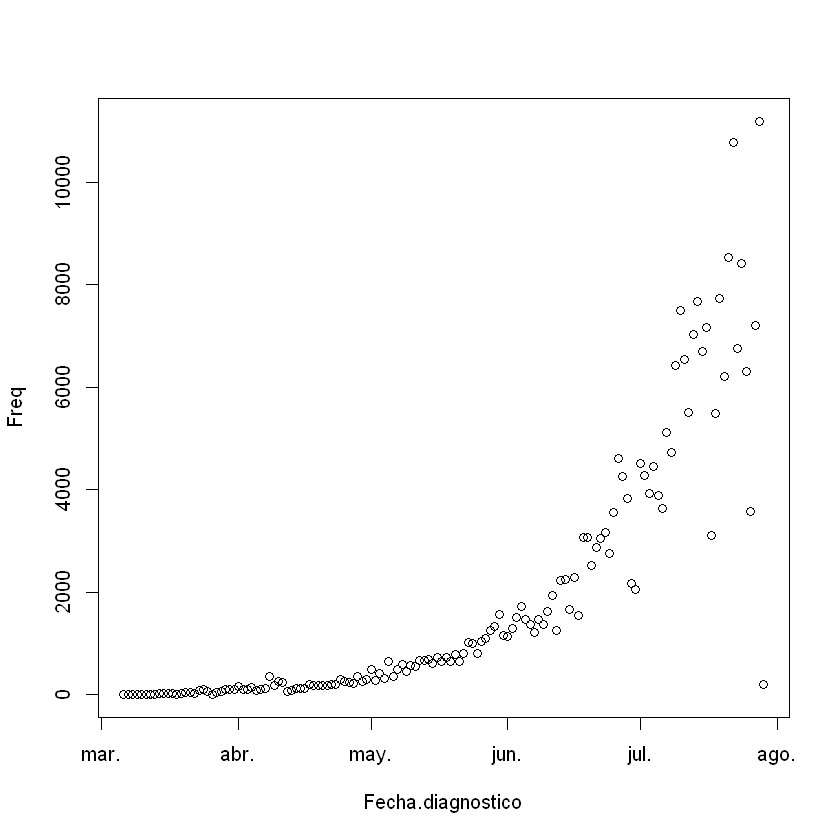

In [38]:
with(casos.fd, plot(Fecha.diagnostico, Freq))

La gráfica pareciera tener un comportamiento similar a lo observado con fecha de notificación, sin embargo, en los últimos días no se observa un comportamiento del todo claro

In [40]:
casosfd <- casos.fd$Freq

Se trajará con tres escenarios, uno sin estacionalidad, otro con estacionalidad de 7 días y el último con estacionalidad de 14 días; aunque es poco probable que el de 14 días sea mejor modelo que alguno de los dos iniciales, ya que por el tipo de situación no parece haber esa relación.

In [45]:
casosfd.ts7<-ts(casosfd[-1], frequency = 7)
casosfd.ts14<-ts(casosfd[-1], frequency = 14)
casosfd.tsn<-ts(casosfd[-1])

Solamente se grafica una de las series ya que la frecuencia no influye en la gráfica

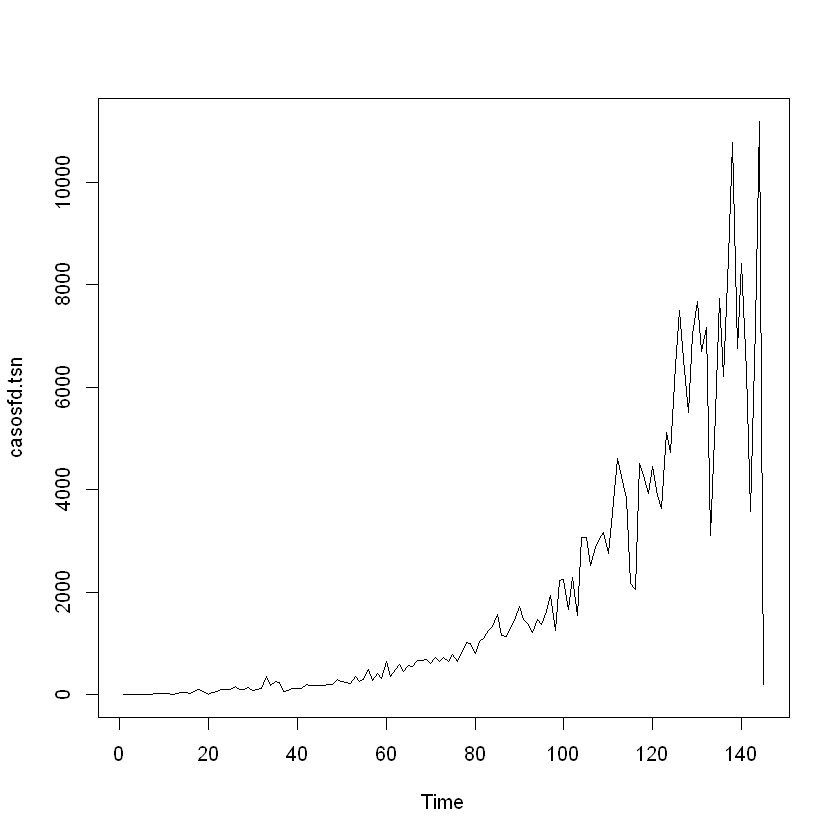

In [46]:
plot(casosfd.tsn)

Se tiene una primera aproximación por descomposición, pero únicamente de las que tienen componente estacional

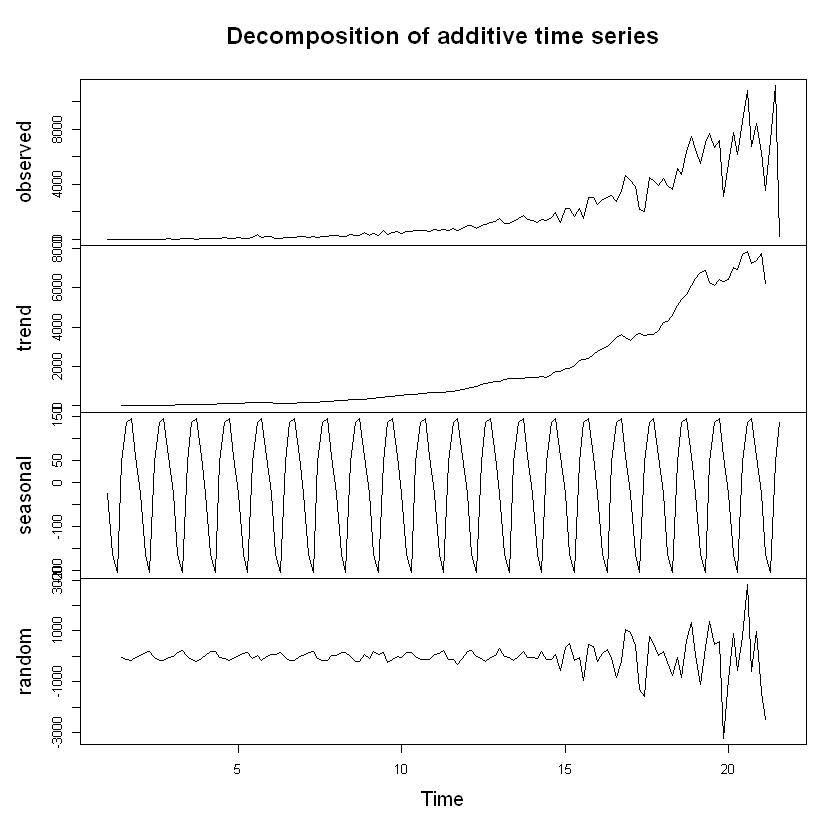

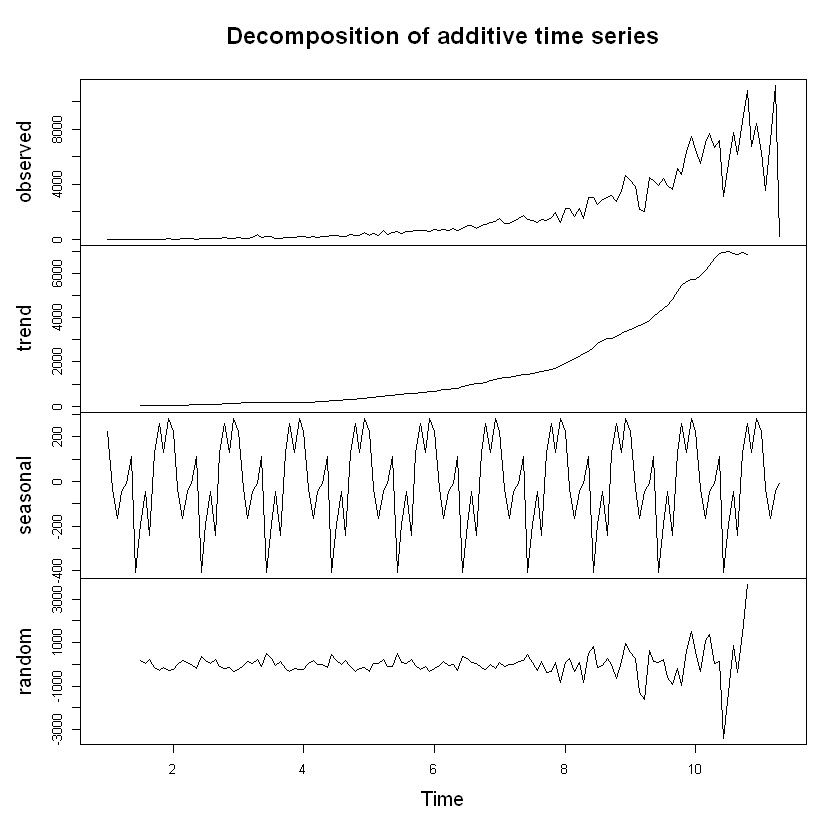

In [47]:
plot(decompose(casosfd.ts7))
plot(decompose(casosfd.ts14))

Así como en fecha de notificación, parecería poder modelarse de mejor forma con descomposición de tipo multiplicativo y no aditivo.

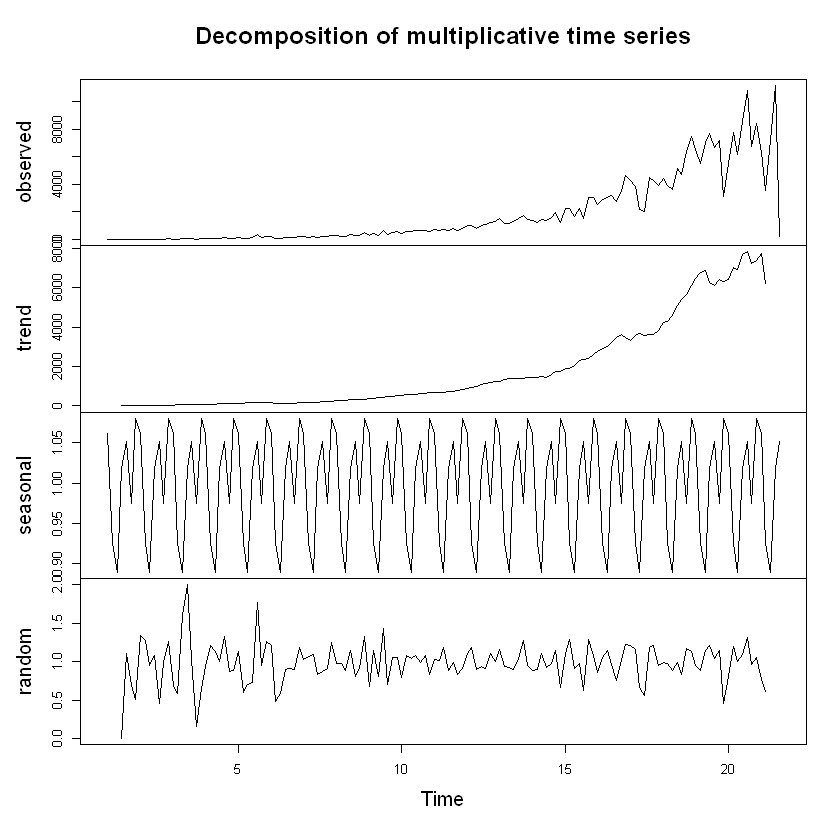

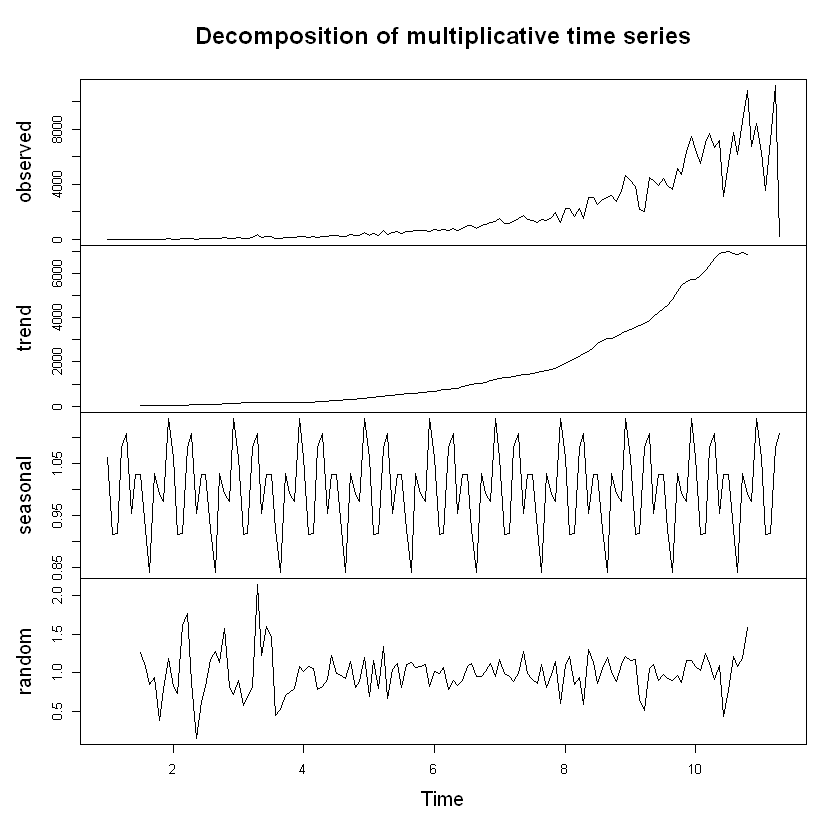

In [48]:
plot(decompose(casosfd.ts7, type = 'multiplicative'))
plot(decompose(casosfd.ts14, type = 'multiplicative'))

Se aprecia el cambio tanto en el componente estacional como el aleatorio; se aprecia que es mejor modelo que del tipo aditivo. En el de 7 días, se observa un valle y dos picos consecutivos. Aún así, es mejor analizarlo desde la metodología de Box-Jenkins

In [49]:
auto.arima(casosfd.ts7)
auto.arima(casosfd.ts14)
auto.arima(casosfd.tsn)

Series: casosfd.ts7 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.6228  -0.7475
s.e.   0.0907   0.0906

sigma^2 estimated as 1066563:  log likelihood=-1203.56
AIC=2413.13   AICc=2413.3   BIC=2422.03

Series: casosfd.ts14 
ARIMA(2,1,0)(0,0,1)[14] 

Coefficients:
          ar1      ar2    sma1
      -0.6667  -0.6235  0.4536
s.e.   0.0931   0.1843  0.4115

sigma^2 estimated as 1053709:  log likelihood=-1203.46
AIC=2414.92   AICc=2415.21   BIC=2426.8

Series: casosfd.tsn 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.6228  -0.7475
s.e.   0.0907   0.0906

sigma^2 estimated as 1066563:  log likelihood=-1203.56
AIC=2413.13   AICc=2413.3   BIC=2422.03

<div style="text-align: justify">A partir de lo anterior ya se pueden observar algunos detalles; por ejemplo, en el caso de periodicidad de estacionalidad de 7 días no hubo ninguna diferencia con el que no tenía ninguna estacionalidad, lo que nos estaría diciendo que no se estaría presentando dicho componente estacional, sino un proceso arima con componente autorregresivo de orden 2, es decir, los datos observados un día específico están influenciados por los datos observados los dos días anteriores, se integra con los errores aunque estos no presentan patrón. <br>
Por el AIC y BIC se observa que este modelo es mejor que el que tiene estacionalidad de 14 días, que se definió como un arima también con componente autorregresivo de orden dos y los errores de orden 1, así como un componente estacional de media móvil de orden 1.</div>
<br>
Se miran las gráficas para ver si se puede obtener mayor información al respecto.

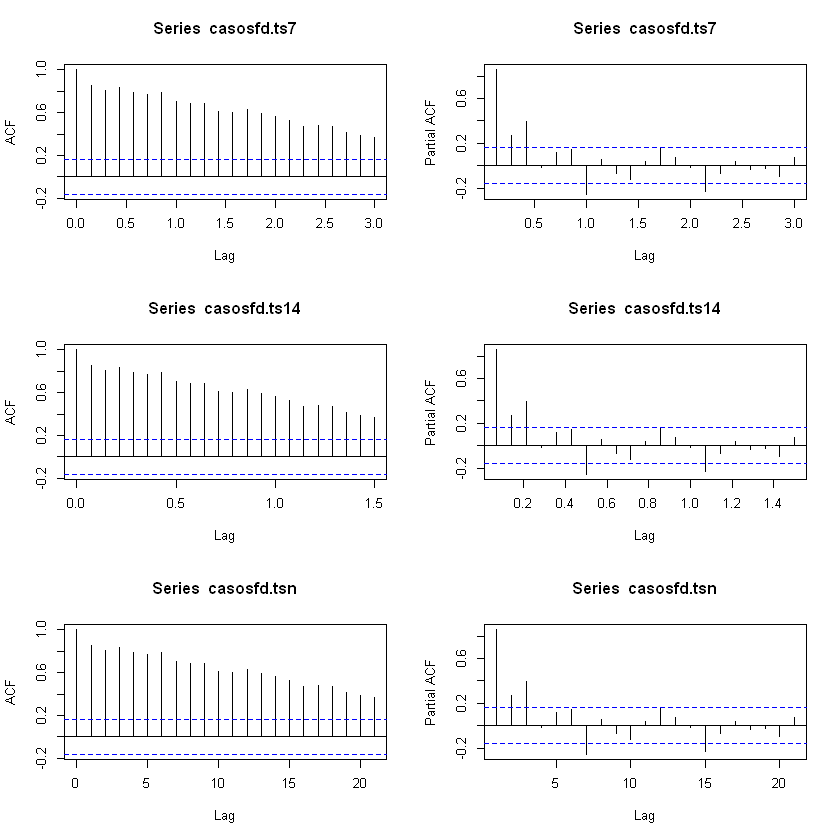

In [50]:
par(mfrow = c(3,2))
acf(casosfd.ts7)
pacf(casosfd.ts7)
acf(casosfd.ts14)
pacf(casosfd.ts14)
acf(casosfd.tsn)
pacf(casosfd.tsn)

Por la gráfica de función de autocorrelación, parece que todas son ARIMA, aunque la de autocorrelación parcial no es del todo clara, no se identifica componente estacional.

In [51]:
predict(auto.arima(casosfd.tsn),5)

$pred
Time Series:
Start = 146 
End = 150 
Frequency = 1 
[1] 4060.083 9870.188 3364.853 3073.528 8117.497

$se
Time Series:
Start = 146 
End = 150 
Frequency = 1 
[1] 1032.745 1103.771 1103.921 1323.592 1438.885

Por lo que se aprecia de la predicción, parece indicar que los valores van a estar fluctuando con crecimientos y decaimientos constantes.

Ahora, se intenta aplicar la primera diferencia para ver si esto esclarece un poco más el proceso. Como se observó que no influye la estacionalidad, se le aplica únicamente al caso en que no lo tiene.

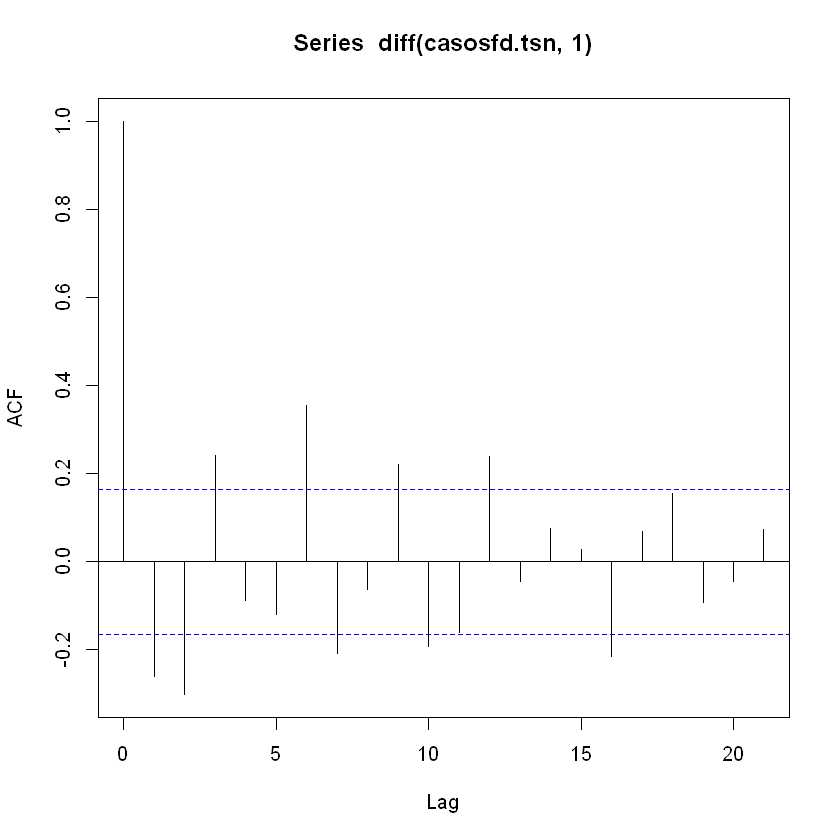

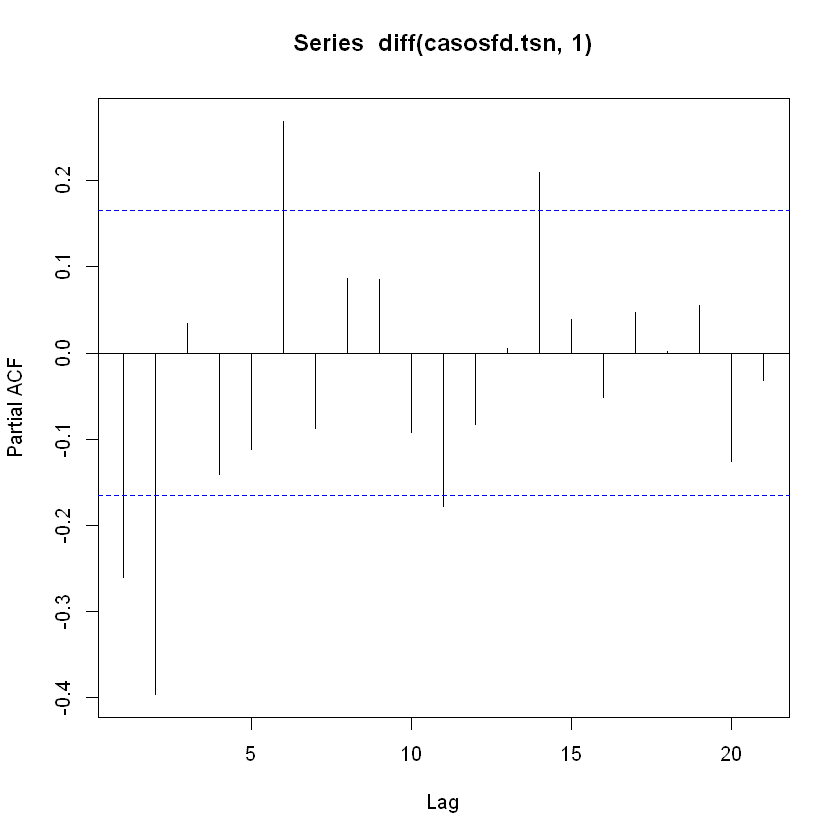

In [71]:
acf(diff(casosfd.tsn,1))
pacf(diff(casosfd.tsn,1))

In [65]:
auto.arima(diff(casosfd.tsn,1))

Series: diff(casosfd.tsn, 1) 
ARIMA(2,0,0) with zero mean 

Coefficients:
          ar1      ar2
      -0.6227  -0.7469
s.e.   0.0917   0.0915

sigma^2 estimated as 1089612:  log likelihood=-1179.99
AIC=2365.98   AICc=2366.16   BIC=2374.83

Aplicando la primera diferencia se obtiene prácticamente el mismo resultado, siendo un proceso autorregresivo de orden 2 e incluso con los mismos valores de AIC y BIC.

## Fecha de Recuperación

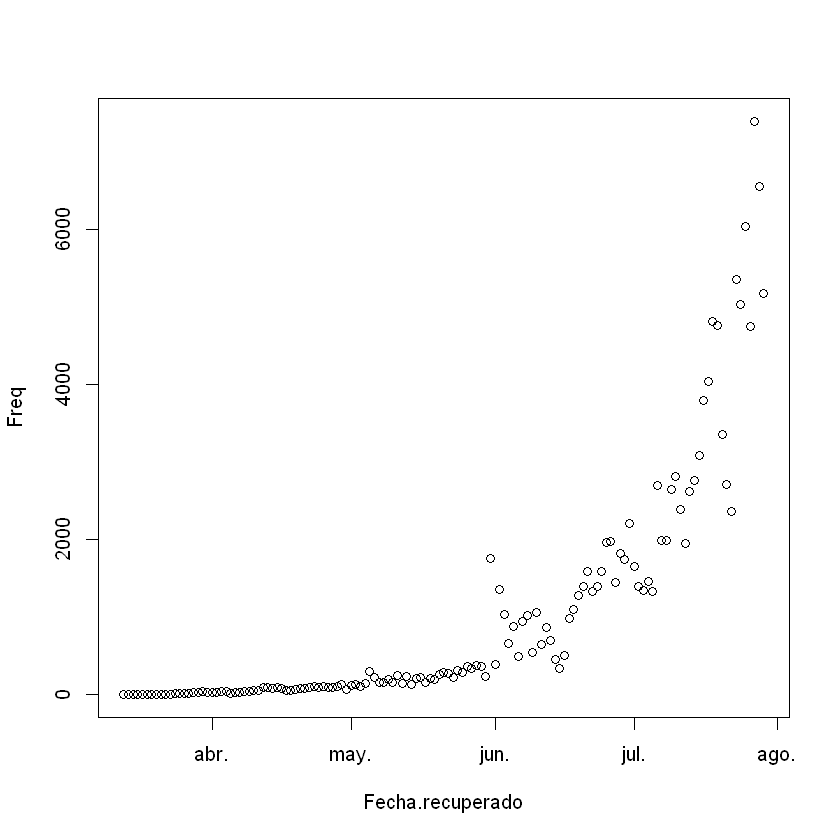

In [52]:
with(casos.fr, plot(Fecha.recuperado, Freq))

La gráfica pareciera tener un comportamiento similar a lo observado en las series de tiempo anteriores pero sin presentar decrecimiento.

In [53]:
casosfr <- casos.fr$Freq

Se analizan dos escenarios, uno con componente estacional de 7 días y otro sin componente estacional.

In [54]:
casosfr.ts7<-ts(casosfr[-1], frequency = 7)
casosfr.tsn<-ts(casosfr[-1])

Solamente se grafica una de las series ya que la frecuencia no influye en la gráfica

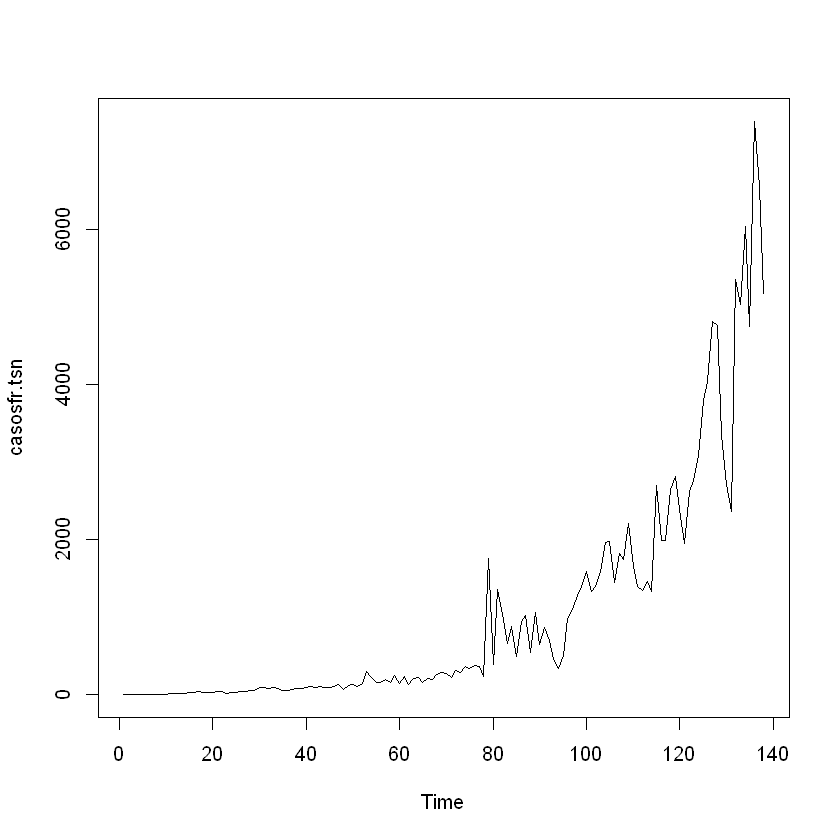

In [55]:
plot(casosfr.tsn)

Se tiene una primera aproximación por descomposición, pero únicamente del que tiene componente estacional

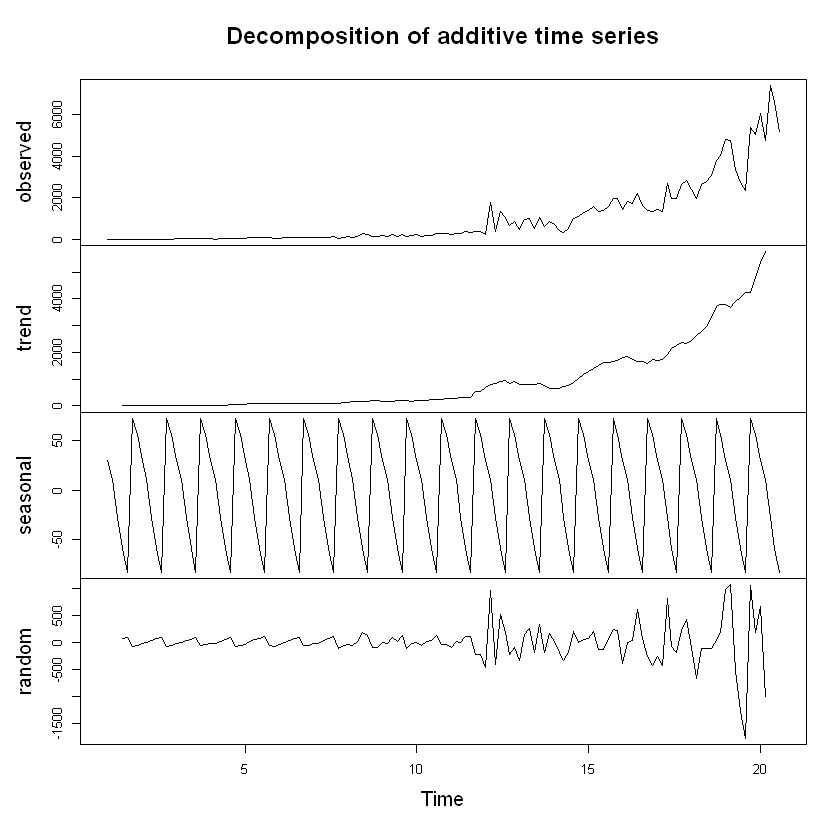

In [57]:
plot(decompose(casosfr.ts7))

Por lo que se muestra, podría ser de tipo multiplicativo, pero no está realmente claro.

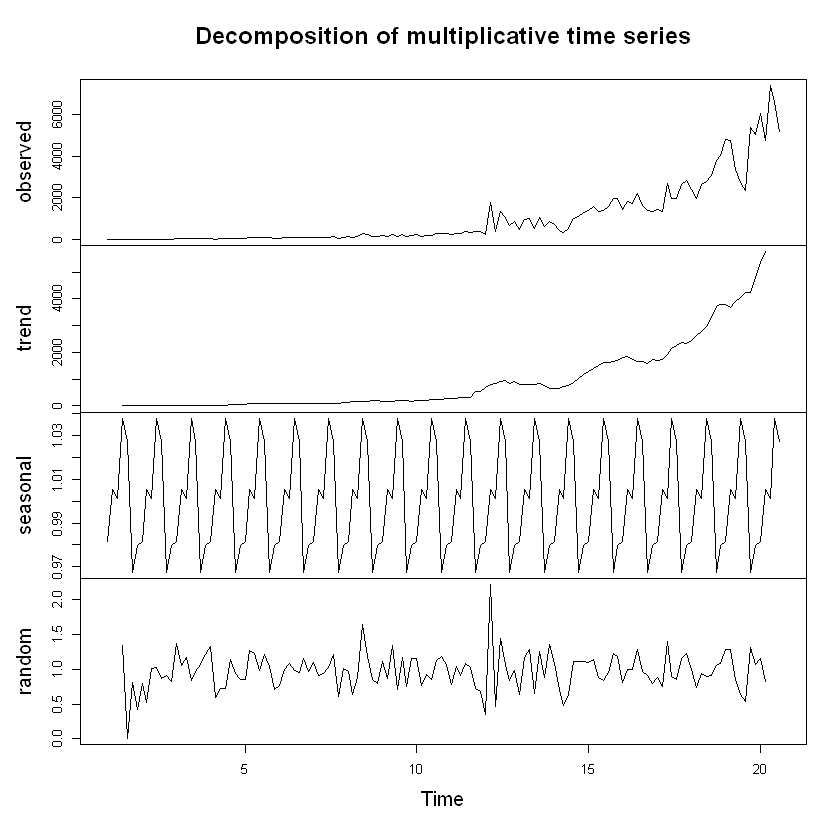

In [59]:
plot(decompose(casosfr.ts7, type = 'multiplicative'))

Se observa algo similar a lo visto en las series de tiempo anteriores, el de tipo multiplicativo ciertamente es mejor que el aditivo. Ahora se analiza desde la metodología de Box-Jenkins.

In [60]:
auto.arima(casosfr.ts7)
auto.arima(casosfr.tsn)

Series: casosfr.ts7 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.4700  42.6019
s.e.   0.0925  21.8640

sigma^2 estimated as 233371:  log likelihood=-1040.2
AIC=2086.4   AICc=2086.58   BIC=2095.16

Series: casosfr.tsn 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.4700  42.6019
s.e.   0.0925  21.8640

sigma^2 estimated as 233371:  log likelihood=-1040.2
AIC=2086.4   AICc=2086.58   BIC=2095.16

<div style="text-align: justify">Se nota que no afecta la estacionalidad, se obtiene exactamente el mismo modelo, lo que indica que esta no está influyendo en nada en la serie de tiempo. Lo que se obtiene es un proceso ARIMA donde no se observa patrón pero se integra con los errores, lo cuales tienen orden 1. Además, se tiene una deriva en el modelo.</div>
<br>
Se miran las gráficas para ver si se puede obtener mayor información al respecto.

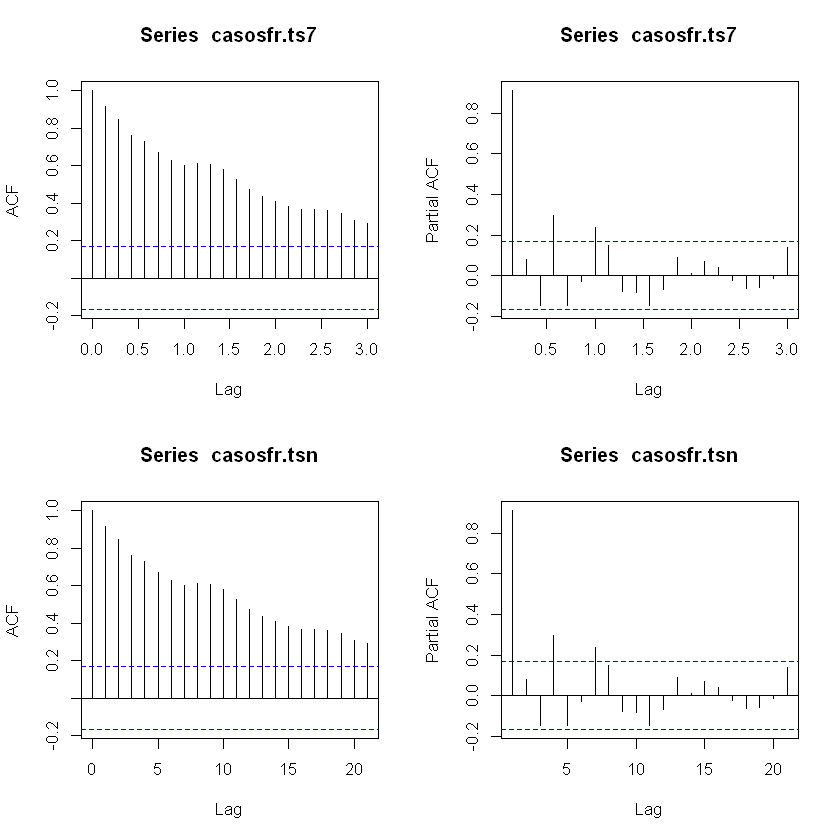

In [62]:
par(mfrow = c(2,2))
acf(casosfr.ts7)
pacf(casosfr.ts7)
acf(casosfr.tsn)
pacf(casosfr.tsn)

Se evidencia lo mismo que con fecha de diagnóstico, la función de autocorrelación apunta a un proceso ARIMA y no se aprecia estacionalidad.

In [63]:
predict(auto.arima(casosfd.tsn),5)

$pred
Time Series:
Start = 146 
End = 150 
Frequency = 1 
[1] 4060.083 9870.188 3364.853 3073.528 8117.497

$se
Time Series:
Start = 146 
End = 150 
Frequency = 1 
[1] 1032.745 1103.771 1103.921 1323.592 1438.885

Por lo que se aprecia de la predicción, parece indicar que los valores van a estar fluctuando con crecimientos y decrecimientos constantes.

Con la primera diferencia, lo único que se haría sería elliminar el componente de integración y, si hubiera, la estacionalidad. Pero no se procede a realizar ya que realmente se obtendría el mismo modelo.

Aplicando la primera diferencia se obtiene prácticamente el mismo resultado, siendo un proceso autorregresivo de orden 2 e incluso con los mismos valores de AIC y BIC.

## Fecha de Inicio de Síntomas

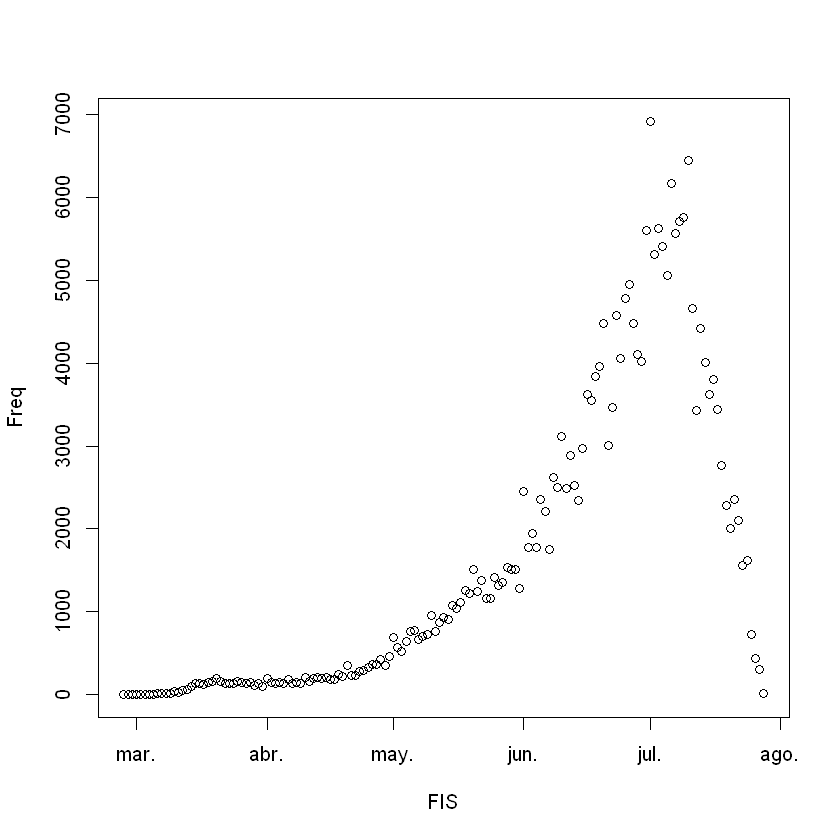

In [64]:
with(casos.fis, plot(FIS, Freq))

La gráfica parece tener un comportamiento similar a lo observado con la anteriores fechas, en especial con fecha de notificación, ya que se presenta ese decrecimiento marcado en los últimos días.

In [65]:
casosfis <- casos.fis$Freq

In [67]:
casosfis.ts7<-ts(casosfis[-1], frequency = 7)
casosfis.tsn<-ts(casosfis[-1])

Solamente se grafica una de las series ya que la frecuencia no influye en la gráfica

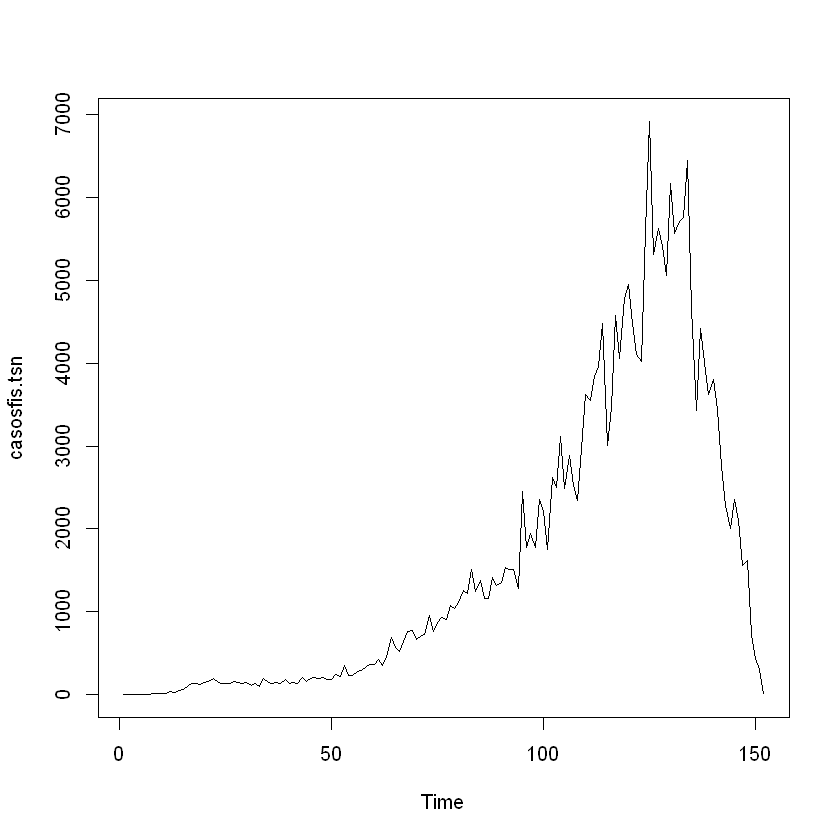

In [68]:
plot(casosfis.tsn)

Se tiene una primera aproximación por descomposición, pero únicamente de las que tienen componente estacional

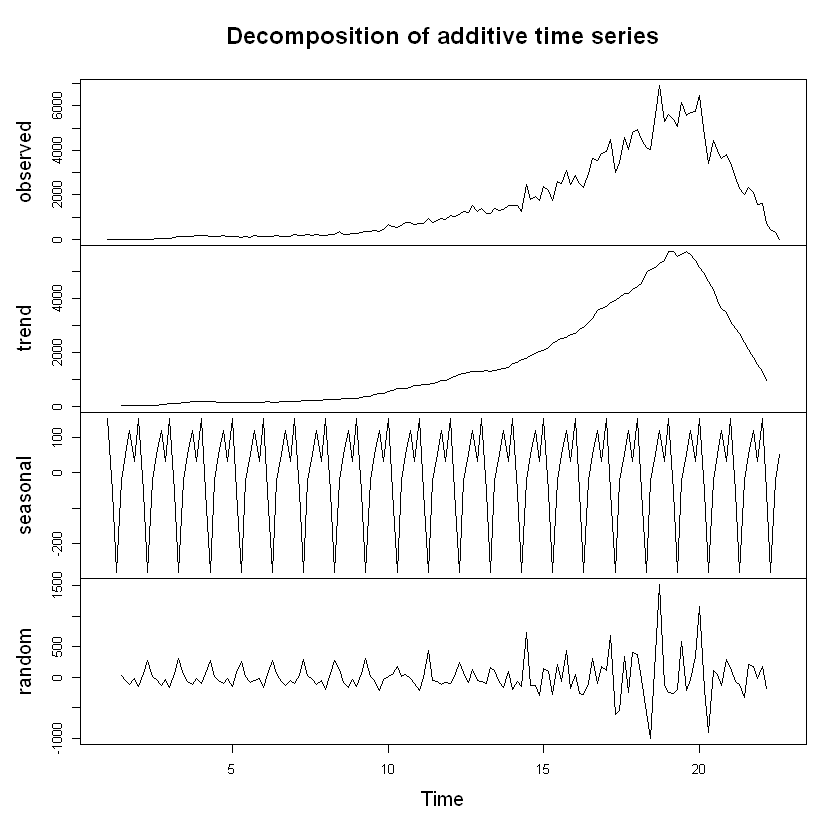

In [70]:
plot(decompose(casosfis.ts7))

Podría ser un proceso multiplicativo, se muestra la descomposición a continuación.

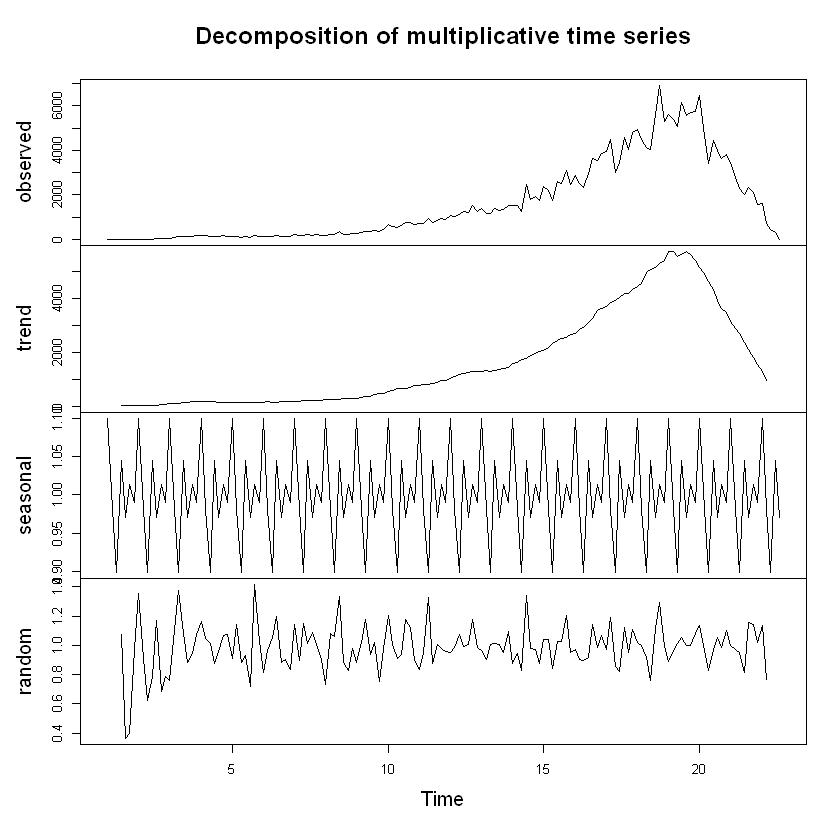

In [71]:
plot(decompose(casosfis.ts7, type = 'multiplicative'))

Se aprecia el cambio tanto en el componente estacional como el aleatorio; el de tipo multiplicativo es un mejor modelo. Ahora se analiza desde la metodología de Box-Jenkins.

In [72]:
auto.arima(casosfis.ts7)
auto.arima(casosfis.tsn)

Series: casosfis.ts7 
ARIMA(0,1,3)(1,0,1)[7] 

Coefficients:
          ma1      ma2     ma3    sar1     sma1
      -0.4780  -0.1837  0.3194  0.7671  -0.3922
s.e.   0.0941   0.0840  0.0858  0.1129   0.1601

sigma^2 estimated as 143757:  log likelihood=-1109.84
AIC=2231.68   AICc=2232.27   BIC=2249.79

Series: casosfis.tsn 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.2726
s.e.   0.0831

sigma^2 estimated as 179448:  log likelihood=-1127.17
AIC=2258.34   AICc=2258.42   BIC=2264.37

<div style="text-align: justify">Este proceso es diferente a los de fecha de diagnóstico y de recuperación. Primero, con estacionalidad de 7 días, se obtiene un proceso ARIMA sin patrón en la autorregresión, pero los errores tienen orden 3; además, presenta un proceso ARMA estacional, con autorregresión de orden 1, es decir, los datos de cierta fecha están influenciados por los datos de 7 días atrás, así como errores de orden 1.<br> Además, en el caso que no se tuvo en cuenta estacionalidad, se obtuvo un proceso ARIMA sin patrón en la autorregresión integrado a los errores con orden 1. <br> Luego de ver todo esto y comparar los AIC y BIC, queda claro que el mejor modelo es el que tiene estacionalidad de 7 días.  </div>
<br>

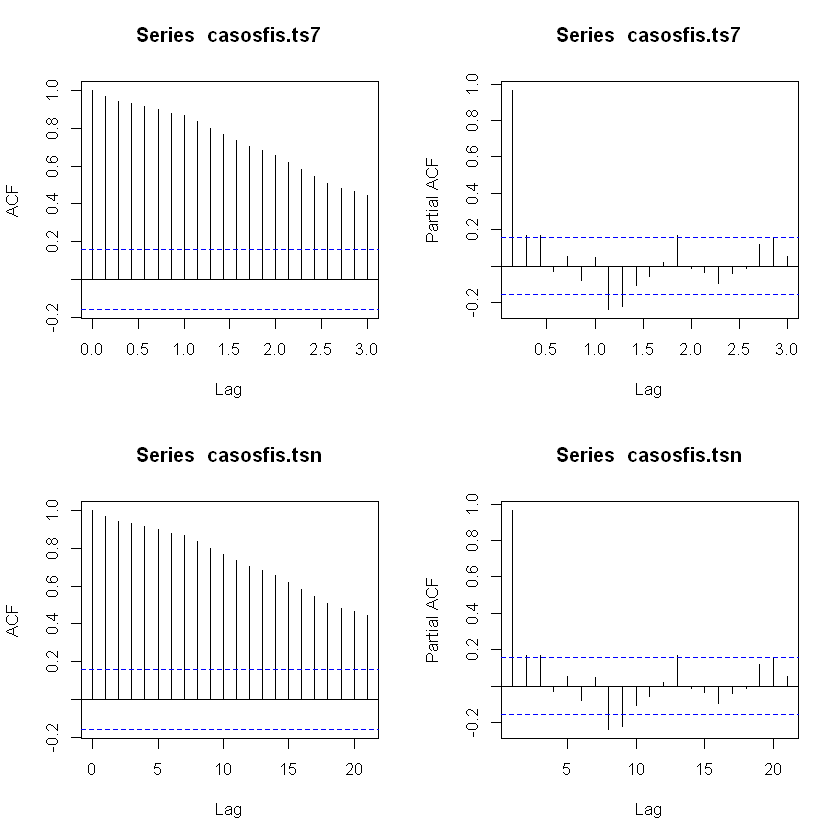

In [76]:
par(mfrow = c(2,2))
acf(casosfis.ts7)
pacf(casosfis.ts7)
acf(casosfis.tsn)
pacf(casosfis.tsn)

Por la gráfica de función de autocorrelación, parece que todas son ARIMA, y se alcanza a apreciar la estacionalidad de 7 días.

In [77]:
predict(auto.arima(casosfis.ts7),5)

$pred
Time Series:
Start = c(22, 6) 
End = c(23, 3) 
Frequency = 7 
[1]   113.3934  -109.5292  -201.5910  -746.9665 -1015.8384

$se
Time Series:
Start = c(22, 6) 
End = c(23, 3) 
Frequency = 7 
[1] 379.1532 427.7062 446.5328 511.4614 569.0290

Por lo que se aprecia de la predicción, el comportamiento reciente indica que los valores seguirán decreciendo.

Ahora, se intenta aplicar la primera diferencia al caso con estacionalidad de 7 días. 

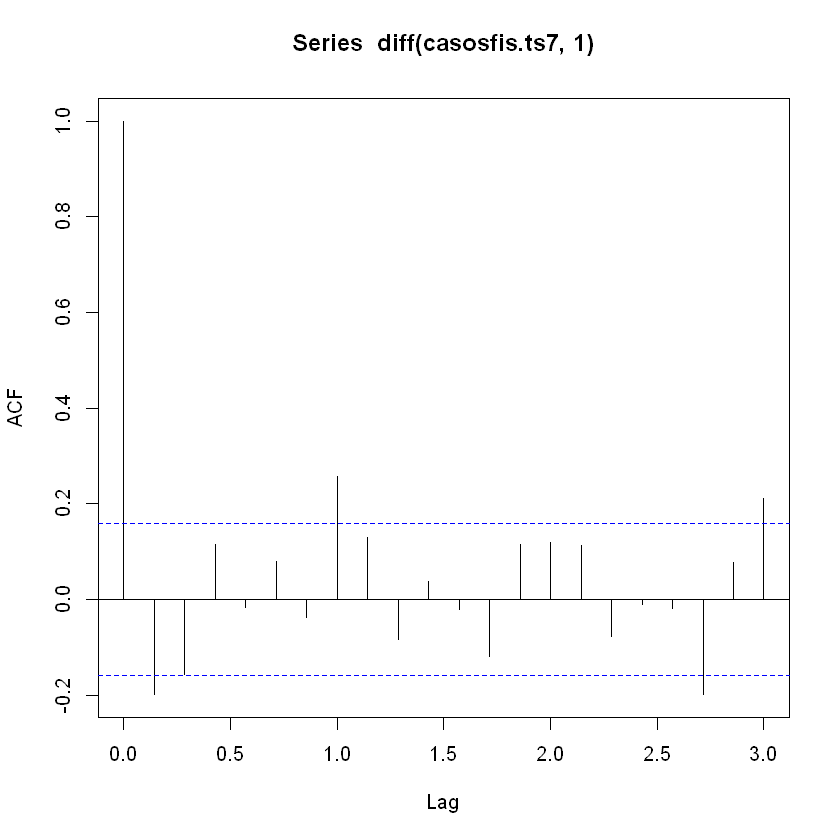

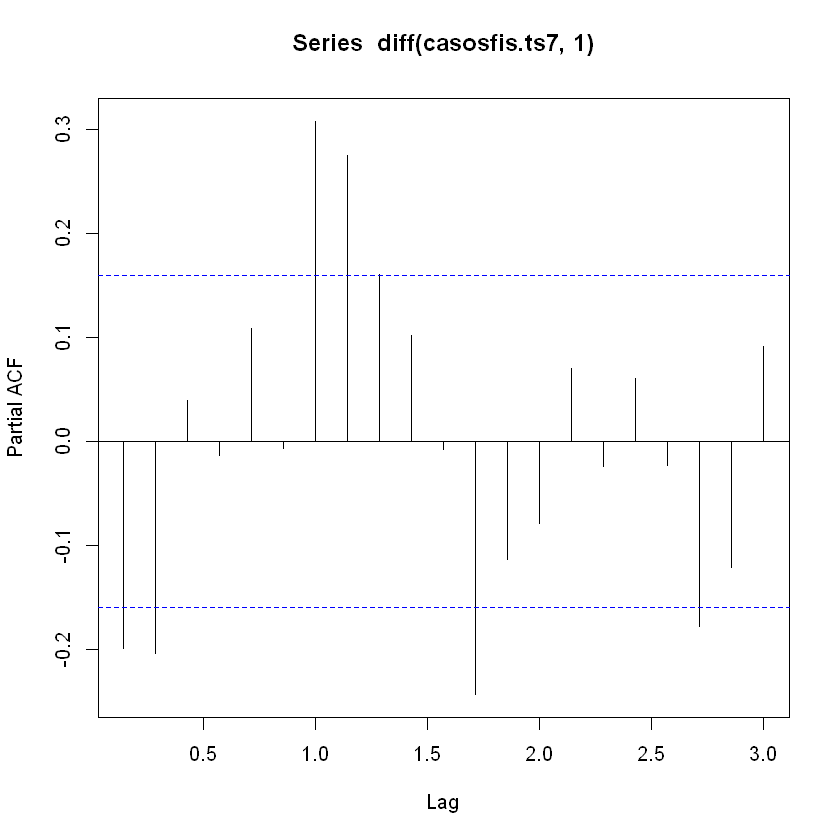

In [78]:
acf(diff(casosfis.ts7,1))
pacf(diff(casosfis.ts7,1))

In [80]:
auto.arima(diff(casosfis.ts7,1))

Series: diff(casosfis.ts7, 1) 
ARIMA(0,0,3)(1,0,1)[7] with zero mean 

Coefficients:
          ma1      ma2     ma3    sar1     sma1
      -0.4780  -0.1837  0.3194  0.7671  -0.3922
s.e.   0.0941   0.0840  0.0858  0.1129   0.1601

sigma^2 estimated as 143757:  log likelihood=-1109.84
AIC=2231.68   AICc=2232.27   BIC=2249.79

Aplicando la primera diferencia se obtiene prácticamente el mismo resultado, siendo un proceso de media móvil de orden 3, conserva la estacionalidad ARMA con componente autorregresivo de orden 1 y los errores también con orden 1. De hecho, lo único que hace la primera diferencia es eliminar el componente de integración sin afectar nada más del modelo.

<font size=5><h4 align="center"> Ejercicio Métodos No Paramétricos en Estadística</h4></font>  

Con base en los datos trabajados en el módulo de muestreo (archivo adjunto en el enlace) extraiga una muestra representativa (calcule el tamaño para un nivel de confianza de 89% y un error de 3% y use ese tamaño específico) y determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Determine si esos resultados son independientes o dependientes entre sí.

Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación

[Descargue el archivo aquí](https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1)

### Librerías

In [2]:
library(devtools)
library(plyr) #Librería necesaria para revalue
library(samplingbook)
library(SamplingUtil) 
library(magrittr) # Permite leer la función %>%
library(dplyr) # Contiene la función select
library(coin)

### Tratamiento de datos

In [3]:
load(url('https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1')) #Se cargan los datos

In [4]:
ls()
dim(sp161718) #dimensiones Dataframe
names(sp161718) #Nombres Variables

[1] "sp161718"

[1] 725295     16

[1] "periodo"                 "apli_consecutivo"       
 [3] "estu_depto_reside"       "estu_cod_reside_depto"  
 [5] "inst_cod_institucion"    "inst_nombre_institucion"
 [7] "raz_cuant_punt"          "raz_cuant_des"          
 [9] "lect_crit_punt"          "lect_crit_des"          
[11] "comp_ciud_punt"          "comp_ciud_des"          
[13] "ingles_punt"             "ingles_desem"           
[15] "comu_escr_punt"          "comu_escr_des"

In [5]:
data<-data.frame(index = 1:nrow(sp161718),
                 Periodo=sp161718$periodo, 
                 Departamento=sp161718$estu_depto_reside,
                 RazCuantP=sp161718$raz_cuant_punt, 
                 RazCuantD=sp161718$raz_cuant_des,
                 LectCritP=sp161718$lect_crit_punt, 
                 LectCritD=sp161718$lect_crit_des, 
                 CompCiudP=sp161718$comp_ciud_punt, 
                 CompCiudD=sp161718$comp_ciud_des, 
                 InglesP=sp161718$ingles_punt,
                 InglesD=sp161718$ingles_desem,
                 ComuEscrP=sp161718$comu_escr_punt, 
                 ComuEscrD=sp161718$comu_escr_des) #Nuevo Dataframe a usar

In [6]:
temp<-factor(data$Periodo) #Para aplicar la función revalue, es necesario pasarle una variable tipo factor
#Se hace el ajuste para que periodo sea únicamente el año
data$Periodo<-revalue(temp, c("20163"="2016", "20162"="2016", "20173"="2017", "20172"="2017","20183"="2018","20182"="2018","20184"="2018")) #Uso de revalue
temp<-factor(data$Departamento)
data$Departamento<-revalue(temp, c("NARIÃ‘O"="NARINO", "NARIÃƒâ\200\230O"="NARINO"))
data <- na.omit(data) 
data$RazCuantD = as.factor(data$RazCuantD) 
data$LectCritD = as.factor (data$LectCritD) 
data$CompCiudD = as.factor(data$CompCiudD) 
data$InglesD = as.factor(data$InglesD) 
data$ComuEscrD = as.factor(data$ComuEscrD)

Se observan los datos y se verifica si se realizaron los cambios

In [7]:
head(data)

,index,Periodo,Departamento,RazCuantP,RazCuantD,LectCritP,LectCritD,CompCiudP,CompCiudD,InglesP,InglesD,ComuEscrP,ComuEscrD
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
1,1,2016,ATLANTICO,160,3,130,2,167,3,160,A2,155,3
2,2,2016,CUNDINAMARCA,138,2,132,2,77,1,125,A1,164,3
3,3,2016,CALDAS,146,2,157,2,150,2,104,A1-,122,2
4,4,2016,MAGDALENA,160,3,172,3,151,2,160,A2,192,4
5,5,2016,CORDOBA,130,2,122,1,144,2,192,B1,131,2
6,6,2016,CAUCA,159,3,129,2,147,2,108,A1-,154,3


### Muestra

Se extrae una muestra representativa con un nivel de confianza de 89% y un error de 3%, usando un muestreo aleatorio simple

In [8]:
tmuestra<-sample.size.prop(e=0.03, P = 0.5, N = nrow(data), level = 0.89)$n
print(tmuestra)

[1] 709


In [9]:
mas<- sample(1:nrow(data),size=tmuestra,replace=FALSE) #Se realiza el MAS
tmas<-data[mas,]

### Prueba de Bondad de Ajuste

Determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Las hipótesis se plantean:

* $H_{0}:$ No hay diferencia entre las proporciones de las categorías.
* $H_{1}:$ Existe diferencia entre las proporciones de las categorías.

#### Competencia de Razonamiento Cuantitativo

In [10]:
RC<- tmas
RC<- data.frame(RC$RazCuantD)
table(RC)

RC
  1   2   3   4 
161 244 270  34 

Aplicamos la prueba:

In [11]:
chisq.test(table(RC))


	Chi-squared test for given probabilities

data:  table(RC)
X-squared = 190.93, df = 3, p-value < 2.2e-16


In [12]:
with(chisq.test(table(RC)), data.frame(observed,expected))

,RC,Freq,expected
,<fct>,<int>,<dbl>
1,1,161,177.25
2,2,244,177.25
3,3,270,177.25
4,4,34,177.25


Según el valor de p-value para la prueba de bondad de ajuste en la competencia de razonamiento cuantitativo se rechaza la hipótesis nula, y debido a esto existe una diferencia entre las proporciones de las categorías, por lo cual se concluye que los datos **no son producto del azar** y hay una razón por la cual los estudiantes quedan clasificados de esa manera. Por último, se puede observar una mayor frecuencia en los niveles de desempeño 2 y 3.


#### Competencia de Lectura Crítica

In [13]:
LC<- tmas
LC<-data.frame(LC$LectCritD)
table(LC)

LC
  1   2   3   4 
171 257 244  37 

Aplicamos la prueba:

In [14]:
chisq.test(table(LC)) 


	Chi-squared test for given probabilities

data:  table(LC)
X-squared = 172.21, df = 3, p-value < 2.2e-16


In [15]:
with(chisq.test(table(LC)), data.frame(observed,expected))

,LC,Freq,expected
,<fct>,<int>,<dbl>
1,1,171,177.25
2,2,257,177.25
3,3,244,177.25
4,4,37,177.25


Según el valor de p-value para la prueba de bondad de ajuste en la competencia de lectura crítica se rechaza la hipótesis nula, y debido esto existe una diferencia entre las proporciones de las categorías, por lo cual se concluye que los datos **no son producto del azar** y hay una razón por la cual los estudiantes quedan clasificados de esa manera. Por último, se puede observar que en esta competencia también existe una mayor frecuencia en los niveles de desempeño 2 y 3.

### Prueba de Independencia 

Determine si esos resultados son independientes o dependientes entre sí.

Las hipótesis se plantean:
* $H_{0}:$ Las competencias son Independientes
* $H_{1}:$ Las competencias son Dependientes

Se va a determinar si existe relación entre las competencias de razonamiento cuantitativo y lectura crítica

In [16]:
with(tmas,table(RazCuantD,LectCritD))

         LectCritD
RazCuantD   1   2   3   4
        1  83  60  18   0
        2  67 110  64   3
        3  19  83 146  22
        4   2   4  16  12

In [17]:
with(tmas,chisq.test(table(RazCuantD, LectCritD)))

Warning message in chisq.test(table(RazCuantD, LectCritD)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(RazCuantD, LectCritD)
X-squared = 243.02, df = 9, p-value < 2.2e-16


In [18]:
with(tmas,chisq.test(table(LectCritD,RazCuantD)))

Warning message in chisq.test(table(LectCritD, RazCuantD)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(LectCritD, RazCuantD)
X-squared = 243.02, df = 9, p-value < 2.2e-16


Observando el valor de p-value se rechaza la hipótesis nula, por lo cual se concluye que las competencias de razonamiento cuantitativo y lectura crítica **son dependientes entre sí**. Esto tiene sentido, ya que para poder rendir en una competencia como lo es razonamiento cuantitativo se debe tener cierta capacidad de análisis y argumentación, lo que tiene relación directa con la lectura crítica. 

### Prueba de Signos

Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación.

Las hipótesis son:

* $H_{0}: mediana = 0$
* $H_{1}: mediana \neq 0$

Agrupación por año y departamento con el promedio de puntajes, y separación de cada periodo

In [19]:
promedio <- data.frame(
  Periodo = data$Periodo,
  Departamento = data$Departamento,
  Promedio = with(data, (CompCiudP+ComuEscrP+InglesP+LectCritP+RazCuantP)/5)
)

departamentos <- promedio %>%
  select(Departamento,Periodo,Promedio) %>%
  group_by(Departamento,Periodo) %>%
  summarise(Puntaje=mean(Promedio))

periodo2016<-departamentos[departamentos$Periodo=='2016',c('Departamento','Puntaje')]
periodo2017<-departamentos[departamentos$Periodo=='2017',c('Departamento','Puntaje')]
periodo2018<-departamentos[departamentos$Periodo=='2018',c('Departamento','Puntaje')]

`summarise()` regrouping output by 'Departamento' (override with `.groups` argument)



Se ordenan los departamentos con un ranking dependiente del puntaje de cada uno y luego se vuelven a ordenar por departamento para así poder ver las variaciones de cada departamento y puntaje en cada periodo o año.

In [20]:
p2016<-periodo2016 %>% arrange(desc(Puntaje))
p2017<-periodo2017 %>% arrange(desc(Puntaje))
p2018<-periodo2018 %>% arrange(desc(Puntaje))

p2016$puesto  <- 1:nrow(p2016)
p2017$puesto  <- 1:nrow(p2017)
p2018$puesto  <- 1:nrow(p2018)

p2016 <- p2016[order(p2016$Departamento),]
p2017 <- p2017[order(p2017$Departamento),]
p2018 <- p2018[order(p2018$Departamento),]

Se visualizan los datos y se observan los cambios 

In [21]:
ord<- data.frame(Departamento=p2016$Departamento,Puesto2016=p2016$puesto,Puesto2017= p2017$puesto,Puesto2018=p2018$puesto)
ord

Departamento,Puesto2016,Puesto2017,Puesto2018
<fct>,<int>,<int>,<int>
,35,1,12
AMAZONAS,26,25,26
ANTIOQUIA,2,4,3
ARAUCA,29,32,29
ATLANTICO,10,12,11
BOGOTA,1,3,2
BOLIVAR,20,13,13
BOYACA,6,7,6
CALDAS,3,6,5


Periodo 2016 y 2017

In [22]:
wilcoxsign_test(p2016$puesto ~ p2017$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.5631, p-value = 0.12
alternative hypothesis: true mu is not equal to 0


Periodo 2017 y 2018

In [23]:
wilcoxsign_test(p2017$puesto ~ p2018$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = 1.1865, p-value = 0.241
alternative hypothesis: true mu is not equal to 0


Periodo 2016 y 2018

In [24]:
wilcoxsign_test(p2016$puesto ~ p2018$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.5064, p-value = 0.1345
alternative hypothesis: true mu is not equal to 0


Para cada cada una de las pruebas realizadas se observa que con el valor de p-value no se rechaza la hipótesis nula. Por lo tanto, se puede afirmar que en el ranking y pruebas aplicadas para los periodos entre 2016-2017, 2017-2018 y 2016-2018, se tiene una mediana igual cero. Siendo así, se puede decir que no se representaron los suficientes cambios o que más de la mitad de los valores no cambiaron. 

<font size=5><h4 align="center"> Ejercicio Diseño de Experimentos</h4></font>  

Plantee un ejercicio, a su gusto, donde sea posible hacer uso de los distintos tipos de Diseño de Experimentos:


*   ANOVA de un Factor (Efectos Fijos)
*   Anova de un Factor (Efectos Aleatorios)
*   Diseño por Bloques
*   Diseño Factorial (Dos Factores)
*   Cuadrado Latino



### ANOVA - Efectos Fijos

Los jugadores de la liga de ajedrez se preparan para un nuevo campeonato de partidas rápidas. Para ello comienzan un entrenamiento intensivo de aperturas (secuencia teórica de movimientos iniciales) y quieren saber si es posible no invertir mucho tiempo en ello para entrenar otros factores. Por lo tanto, quieren determinar si habrá un diferente tiempo de reacción de los jugadores (en segundos), con diferentes tiempos de entrenamiento en horas durante las 10 primeras jugadas. El estudio arroja los siguientes datos:

In [26]:
#Conjunto de datos
Input1 = (" Tentrenamiento  Treaccion
'1'  26
'1'  23
'1'  34
'1'  31
'1'  17
'2'  16
'2'  18
'2'  15
'2'  20
'2'  21
'3'  32
'3'  23
'3'  14
'3'  18
'3'  27
'4'  9
'4'  15
'4'  12
'4'  10
'4'  11
")

data1<-read.table(textConnection(Input1),header=TRUE)
head(data1)

,Tentrenamiento,Treaccion
,<int>,<int>
1,1,26
2,1,23
3,1,34
4,1,31
5,1,17
6,2,16


Por lo tanto la hipótesis es, de forma equivalente:

\begin{equation}
H_{0} : \tau_{j} = 0 , \quad j=1,2,...,4.
\end{equation}

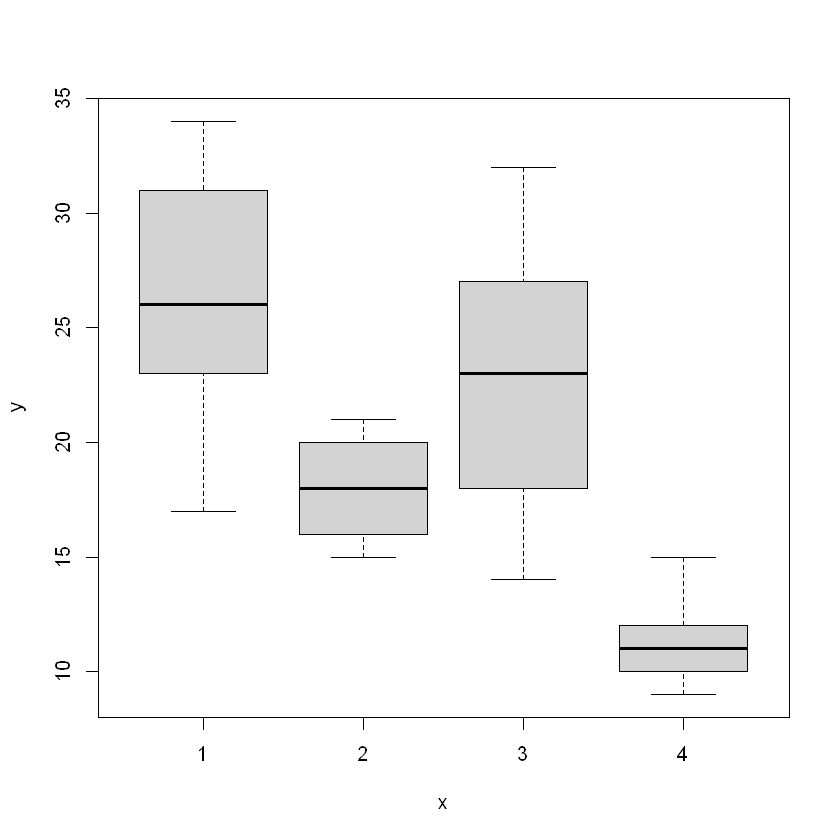

In [28]:
#Gráfica
data1$Tentrenamiento<-factor(data1$Tentrenamiento)
with(data1, plot(Tentrenamiento,Treaccion))

Desde la gráfica ya puede observarse que las aperturas tienen diferentes medias, para la 2 y la 4 parece que suele llevar a posiciones más familiares por lo que no solo hay poca desviación, también un menor tiempo promedio. Por otro lado la 1 y la 3 tienen mayor desviación y un tiempo mayor en promedio. Aun así, puede observarse que las tres primeras aperturas podrían tener el mismo tiempo empleado, lo que haría no tan evidente rechazar la hipótesis nula.

Por lo tanto se agrupa la información en una tabla de  de análisis de varianza para sacar una conclusión:

In [29]:
# La ANOVA en detalle
m.aov1<-lm(Treaccion~Tentrenamiento,data=data1)
aov.m1<-aov(m.aov1)
summary(aov.m1)

               Df Sum Sq Mean Sq F value  Pr(>F)   
Tentrenamiento  3  618.0   206.0   7.687 0.00211 **
Residuals      16  428.8    26.8                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [30]:
summary(m.aov1)


Call:
lm(formula = Treaccion ~ Tentrenamiento, data = data1)

Residuals:
   Min     1Q Median     3Q    Max 
 -9.20  -2.55  -0.10   3.15   9.20 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       26.200      2.315  11.317 4.79e-09 ***
Tentrenamiento2   -8.200      3.274  -2.504 0.023462 *  
Tentrenamiento3   -3.400      3.274  -1.038 0.314505    
Tentrenamiento4  -14.800      3.274  -4.520 0.000349 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.177 on 16 degrees of freedom
Multiple R-squared:  0.5904,	Adjusted R-squared:  0.5136 
F-statistic: 7.687 on 3 and 16 DF,  p-value: 0.002109


Con esta tabla podemos observar el intercepto con la apertura 1. se observa por medio del p-valor que existen diferencias significativas con las demás aperturas menos la número 3. Por último realizamos el test de medias:

In [31]:
# Test de comparación de medias:
library(stats)
pairwise.t.test(data1$Treaccion,data1$Tentrenamiento, p.adjust.method="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data1$Treaccion and data1$Tentrenamiento 

  1      2      3     
2 0.1408 -      -     
3 1.0000 0.9721 -     
4 0.0021 0.3656 0.0185

P value adjustment method: bonferroni 

In [32]:
tk.aov.m1<-TukeyHSD(aov.m1)
tk.aov.m1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov1)

$Tentrenamiento
     diff        lwr       upr     p adj
2-1  -8.2 -17.567383  1.167383 0.0972583
3-1  -3.4 -12.767383  5.967383 0.7300064
4-1 -14.8 -24.167383 -5.432617 0.0017813
3-2   4.8  -4.567383 14.167383 0.4793295
4-2  -6.6 -15.967383  2.767383 0.2232382
4-3 -11.4 -20.767383 -2.032617 0.0146704


Con estos tests pueden sacarse mejores conclusiones. Ya que en la gráfica pudimos ver que la apertura 1 y 3 tienen una alta dispersión, vemos p-valores más altos de los pares relacionados a estas aperturas, y los más bajos se encuentran con los pares de la apertura 4. Aun así, podemos decir gracias a la comparación de los pares que la apertura 1 y la 2 son estadísticamente iguales a la apertura 3, y las demás son estadísticamente diferentes entre ellas.

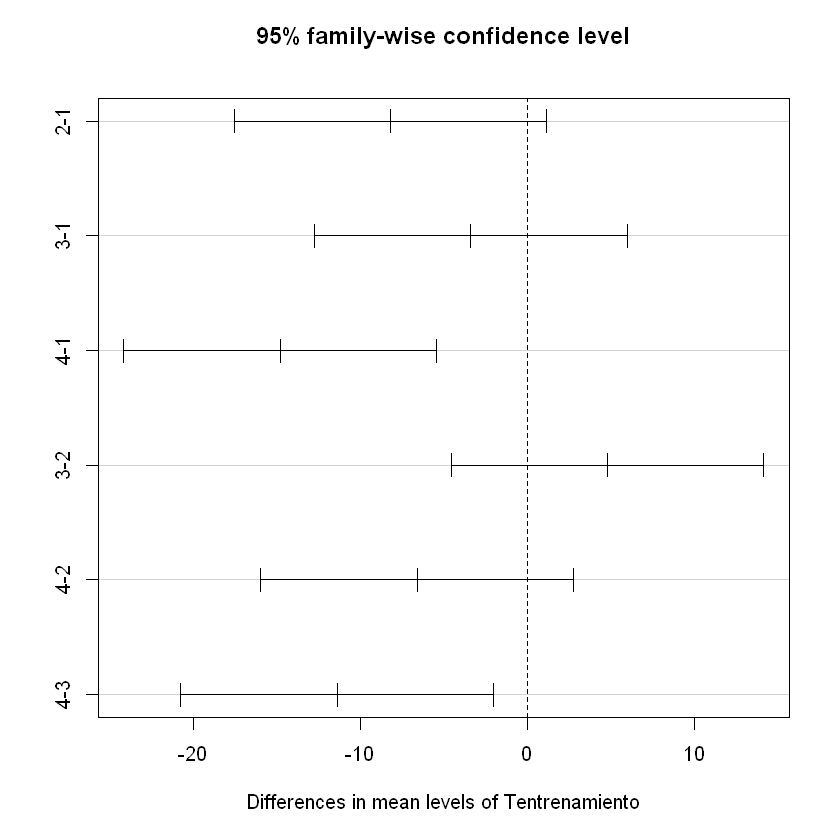

In [33]:
plot(tk.aov.m1)

Finalizando, vemos que en la gráfica el 0 atraviesa más hacia el centro del intervalo de confianza en las aperturas 1-3 y 2-3, confirmando la conclusión sacada anteriormente, rechazando así la hipótesis.

### ANOVA - Efectos Aleatorios

Un profesor sospecha que hay muy poca variación en las notas finales de los estudiantes en tres grupos diferentes de una materia. Para verificar su sospecha, escoge de forma aleatoria cinco estudiantes de cada grupo, y sus notas finales se muestran en la siguiente tabla:

| Grupo 1 | Grupo 2 | Grupo 3 |
|------|------|------|
| 3.2    | 3.0    | 2.9   |
| 3.4   | 3.0   | 3.0   |
| 3.3   | 3.1   | 2.9   |
| 3.3   | 3.2   | 3.0   |
| 3.2    | 3.0   | 3.1   |

La Hipótesis nula del problema es:
\begin{equation}
H_{0} : \sigma²_{\tau} = 0
\end{equation}

In [34]:
#Conjunto de datos
Input2 = (" Grupo Nota
'1'  3.2
'1'  3.4
'1'  3.3
'1'  3.3
'1'  3.2
'2'  3.0
'2'  3.0
'2'  3.1
'2'  3.2
'2'  3.0
'3'  2.9
'3'  3.0
'3'  2.9
'3'  3.0
'3'  3.1
")

data2<-read.table(textConnection(Input2),header=TRUE)
head(data2)

,Grupo,Nota
,<int>,<dbl>
1,1,3.2
2,1,3.4
3,1,3.3
4,1,3.3
5,1,3.2
6,2,3.0


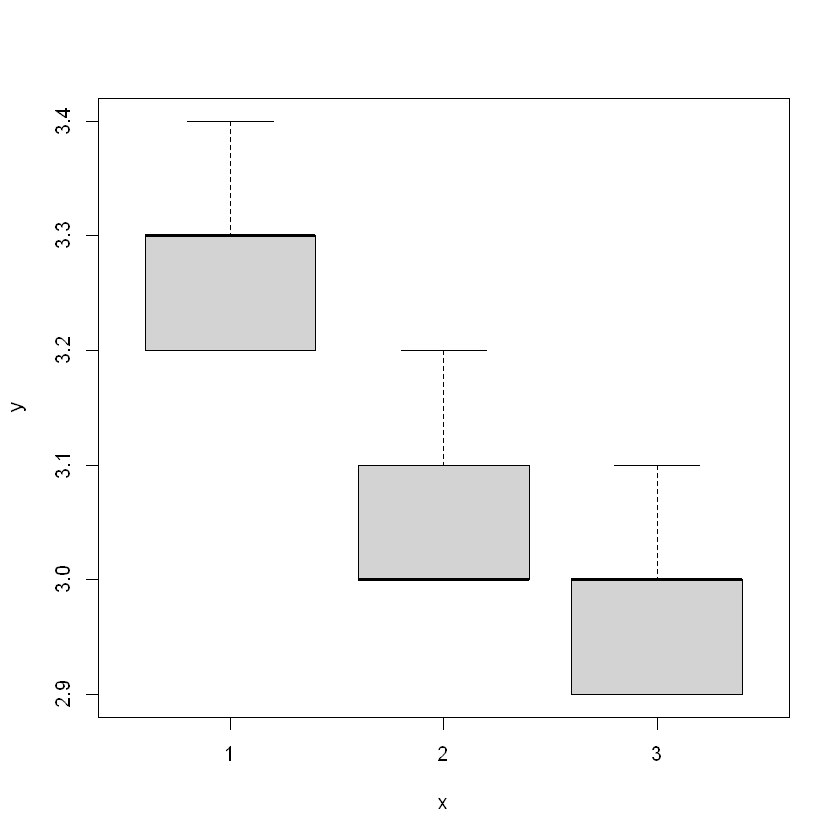

In [35]:
#Gráfica
data2$Grupo<-factor(data2$Grupo)
with(data2, plot(Grupo,Nota))

En la gráfica podemos observar que los tres grupos presentan una dispersión homogenea, lo que en un primer vistazo nos podría llevar a la conclusión de que las varianzas entre ellos son iguales. Sin embargo, cabe recalcar que un diagrama de caja no es muy confiable si se cuenta con solo 5 datos, esto se debe a que en el rango intercuartílico se tienen cinco medidas, por lo tanto cada dato estaría ocupando cada medida del rango. Por esta razón nos apoyamos en el análisis de la varianza:

In [36]:
m.aov2<-lm(Nota~Grupo,data=data2)
summary(m.aov2)


Call:
lm(formula = Nota ~ Grupo, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -0.08  -0.07   0.02   0.03   0.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.28000    0.03830  85.646  < 2e-16 ***
Grupo2      -0.22000    0.05416  -4.062 0.001576 ** 
Grupo3      -0.30000    0.05416  -5.539 0.000128 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08563 on 12 degrees of freedom
Multiple R-squared:  0.7328,	Adjusted R-squared:  0.6883 
F-statistic: 16.45 on 2 and 12 DF,  p-value: 0.000364


In [37]:
# La ANOVA en detalle
aov.m2<-aov(m.aov2)
summary(aov.m2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Grupo        2 0.2413 0.12067   16.45 0.000364 ***
Residuals   12 0.0880 0.00733                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Podemos observar que el p-valor > 0, lo que refutaría la hipótesis nula de la varianza siendo 0. Podemos estimar la varianza de las notas y qué proporción de esta puede atribuirse a la diferencia de los tratamientos, teniendo en cuenta que para un modelo de efectos aleatorios

\begin{equation}
Var_{(Y_{ij})} = \sigma² + \sigma²_{\tau}
\end{equation}

un estimado de $\sigma²$ es $MS_{Error}$ = 0.00733, y un estimador de $\sigma² + 5\sigma²_{\tau}$ es $MS_{Tratamientos}$ = 0.12067. En otras palabras,

\begin{equation}
0.00733 + 5\sigma²_{\tau} = 0.12067
\end{equation}

\begin{equation}
\sigma²_{\tau} = \frac{0.12067-0.00733}{5} = 0.022668
\end{equation}

Entonces un estimador de la varianza en las notas es

\begin{equation}
Var_{(Y_{ij})} = 0.00733 + 0.022668 = 0.029998
\end{equation}

de la cual 0.022668/0.029998, o el 75.56% se debe a diferencias entre los grupos.

### Diseño por bloques - Factores
Se llevó a cabo una investigación en un lugar de trabajo para determinar si existen diferencias apreciables en los salarios iniciales con base en el sexo, localidad del lugar de trabajo o la interacción de los dos. El estudio se realiza en 3 oficinas diferentes de la misma empresa a 4 hombres y 4 mujeres con la misma edad y mismo promedio durante sus estudios; todos se graduaron de la misma universidad y ninguno cuenta con experiencia laboral. Se recolectaron los datos de la siguiente tabla:

| T\B| Of1 | Of2 | Of3   |
|----|------|------|------|
| M1 | 15.2 | 14.9 | 16.2 |
| M2 | 16.8 | 16.2 | 15.9 |
| M3 | 15.5 | 15.6 | 16.8 |
| M4 | 14.9 | 15.3 | 15.8 |
| H1 | 18.1 | 17.8 | 18.4 |
| H2 | 16.3 | 18.2 | 16.8 |
| H3 | 17.2 | 18.1 | 17.5 |
| H4 | 17.9 | 17.6 | 18.7 |

In [38]:
#Conjunto de datos
Input3 = (" Factor Bloque Salario
'M1'  Of1 15.2
'M1'  Of2 14.9
'M1'  Of3 16.2
'M2'  Of1 16.8
'M2'  Of2 16.2
'M2'  Of3 15.9
'M3'  Of1 15.5
'M3'  Of2 15.6
'M3'  Of3 16.8
'M4'  Of1 14.9
'M4'  Of2 15.3
'M4'  Of3 15.8
'H1'  Of1 18.1
'H1'  Of2 17.8
'H1'  Of3 18.4
'H2'  Of1 16.3
'H2'  Of2 18.2
'H2'  Of3 16.8
'H3'  Of1 17.2
'H3'  Of2 18.1
'H3'  Of3 17.5
'H4'  Of1 17.9
'H4'  Of2 17.6
'H4'  Of3 18.7
")

data3<-read.table(textConnection(Input3),header=TRUE)
head(data3)

,Factor,Bloque,Salario
,<chr>,<chr>,<dbl>
1,M1,Of1,15.2
2,M1,Of2,14.9
3,M1,Of3,16.2
4,M2,Of1,16.8
5,M2,Of2,16.2
6,M2,Of3,15.9


In [39]:
# Hacemos la prueba
test<-aov(Salario~Factor+Bloque,data=data3)
summary(test)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Factor       7 26.870   3.839  11.020 9.53e-05 ***
Bloque       2  1.110   0.555   1.593    0.238    
Residuals   14  4.877   0.348                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Desde aquí podemos ver claramente gracias al p-valor que las diferencias significativas se deben al factor y no al bloque.

In [40]:
# El modelo
summary(lm(Salario~Factor+Bloque,data=data3))


Call:
lm(formula = Salario ~ Factor + Bloque, data = data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67500 -0.35000 -0.04167  0.27708  1.12500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.85000    0.38097  46.854  < 2e-16 ***
FactorH2    -1.00000    0.48189  -2.075 0.056885 .  
FactorH3    -0.50000    0.48189  -1.038 0.317059    
FactorH4    -0.03333    0.48189  -0.069 0.945831    
FactorM1    -2.66667    0.48189  -5.534 7.37e-05 ***
FactorM2    -1.80000    0.48189  -3.735 0.002217 ** 
FactorM3    -2.13333    0.48189  -4.427 0.000574 ***
FactorM4    -2.76667    0.48189  -5.741 5.10e-05 ***
BloqueOf2    0.22500    0.29510   0.762 0.458442    
BloqueOf3    0.52500    0.29510   1.779 0.096941 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5902 on 14 degrees of freedom
Multiple R-squared:  0.8516,	Adjusted R-squared:  0.7562 
F-statistic: 8.925 on 9 and 14 DF,  p-value: 0.0001982

En este caso el intercepto se hace con el Hombre 1. Vemos que las diferencias más significativas en el salario son, en efecto, con las cuatro mujeres, que ganan menos, mientras que los otros hombres ganan aproximadamente lo mismo.
Con base en la información recolectada, puede concluirse que el único efecto discernible estadísticamente en el salario se debe al sexo del empleado.

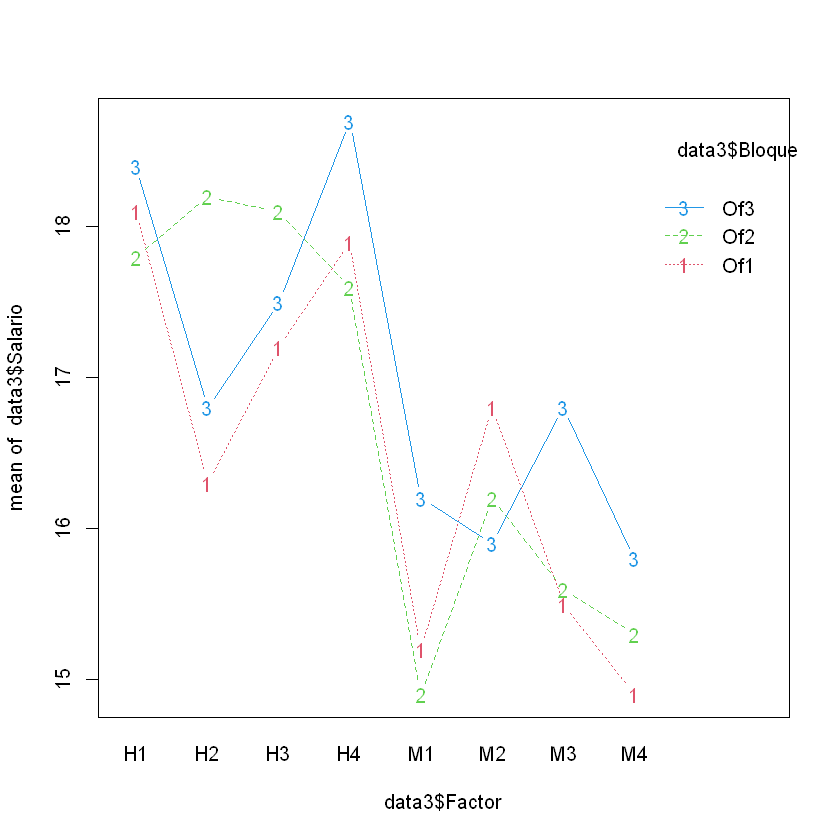

In [41]:
# Hay algo que debemos procurar mirar, la interacción
interaction.plot(data3$Factor,data3$Bloque,data3$Salario,type="b",col=c(2:4))

En la gráfica no podemos observar de forma clara puntos de convergencia que indiquen una interacción entre los factores y los bloques.

In [42]:
summary(lm(Salario~Factor:Bloque,data=data3))


Call:
lm(formula = Salario ~ Factor:Bloque, data = data3)

Residuals:
ALL 24 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)            15.8         NA      NA       NA
FactorH1:BloqueOf1      2.3         NA      NA       NA
FactorH2:BloqueOf1      0.5         NA      NA       NA
FactorH3:BloqueOf1      1.4         NA      NA       NA
FactorH4:BloqueOf1      2.1         NA      NA       NA
FactorM1:BloqueOf1     -0.6         NA      NA       NA
FactorM2:BloqueOf1      1.0         NA      NA       NA
FactorM3:BloqueOf1     -0.3         NA      NA       NA
FactorM4:BloqueOf1     -0.9         NA      NA       NA
FactorH1:BloqueOf2      2.0         NA      NA       NA
FactorH2:BloqueOf2      2.4         NA      NA       NA
FactorH3:BloqueOf2      2.3         NA      NA       NA
FactorH4:BloqueOf2      1.8         NA      NA       NA
FactorM1:BloqueOf2     -0.9      

Los valores perdidos del modelo reafirman la falta de interacción entre los factores y los bloques.

### Cuadrado Latino

Cuatro carros y cuatro conductores son empleados en un estudio para investigar las posibles diferencias en cuatro aditivos en la gasolina (A, B, C, D). Incluso siendo los carros del mismo modelo, podrían existir ligeras diferencias sistemáticas en su desempeño, y, por otra parte, incluso teniendo los conductores una destreza similar y que conduzcan de la forma más óptima requerida por el test, podrían encontrarse pequeñas diferencias entre cada conductor. Por lo tanto, se quisieran eliminar en el modelo las diferencias tanto de carro-con-carro, como las de conductor-conductor. El desempeño global en cada prueba fue registrado en la siguiente tabla:
                
| Conductores | 1  | 2  | 3  | 4  |
|----------|----|----|----|----|
| 1        | A  | B  | C  | D  |
| _        | 34 | 39 | 44 | 32 |
| 2        | B  | C  | D  | A  |
| _        | 38 | 40 | 34 | 32 |
| 3        | C  | D  | A  | B  |
| _        | 39 | 34 | 36 | 41 |
| 4        | D  | A  | B  | C  |
| _        | 33 | 31 | 38 | 37 |

Podemos simplificar los datos restando 35 a cada valor:

| Conductores | 1  | 2  | 3  | 4  |
|----------|----|----|----|----|
| 1        | A  | B  | C  | D  |
| _        | -1 | 4 | 9 | -3 |
| 2        | B  | C  | D  | A  |
| _        | 3 | 5 | -1 | -3 |
| 3        | C  | D  | A  | B  |
| _        | 4 | -1 | 1 | 6 |
| 4        | D  | A  | B  | C  |
| _        | -2 | -4 | 3 | 2 |

In [43]:
#Conjunto de datos
Input4 = (" Aditivo Conductor Carro Desempeño
'A'  1 1 -1
'B'  1 2 4
'C'  1 3 9
'D'  1 4 -3
'B'  2 1 3
'C'  2 2 5
'D'  2 3 -1
'A'  2 4 -3
'C'  3 1 4
'D'  3 2 -1
'A'  3 3 1
'B'  3 4 6
'D'  4 1 -2
'A'  4 2 -4
'B'  4 3 3
'C'  4 4 2
")

read.table(textConnection(Input4),header=TRUE)->data4
head(data4)

,Aditivo,Conductor,Carro,Desempeño
,<chr>,<int>,<int>,<int>
1,A,1,1,-1
2,B,1,2,4
3,C,1,3,9
4,D,1,4,-3
5,B,2,1,3
6,C,2,2,5


Cuando existen n factores en el modelo, es difícil identificar a simple vista en una tabla nxn qué factores podrían proporcionar diferencias estadísticamente significativas, por lo tanto lo analizaremos con los modelos que hemos usado anteriormente.

In [44]:
# Convertimos en factor Carro y Conductor
attach(data4)
Carro<-as.factor(Carro)
Conductor<-as.factor(Conductor)

In [45]:
# Modelo anova
model4<-aov(Desempeño~Carro+Conductor+Aditivo)
summary(model4)

            Df Sum Sq Mean Sq F value Pr(>F)   
Carro        3  14.75    4.92   1.903 0.2302   
Conductor    3  19.25    6.42   2.484 0.1580   
Aditivo      3 158.25   52.75  20.419 0.0015 **
Residuals    6  15.50    2.58                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Podemos observar gracias al p-valor que el Aditivo es el único factor que influye significativamente en la variación del desempeño de los tests. Para reforzar la hipótesis, podemos analizar las medias de cada factor.

In [46]:
# Las tablas de medias
model.tables(model4, "mean")

Tables of means
Grand mean
      
1.375 

 Carro 
Carro
  1   2   3   4 
1.0 1.0 3.0 0.5 

 Conductor 
Conductor
    1     2     3     4 
 2.25  1.00  2.50 -0.25 

 Aditivo 
Aditivo
    A     B     C     D 
-1.75  4.00  5.00 -1.75 

Podemos observar que las medias de carro y conductor son homogeneas a diferencia del Aditivo. Esto quiere decir que este representa la mayor variación en los valores de desempeño.

In [47]:
# La prueba de Tukey
TukeyHSD(model4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Desempeño ~ Carro + Conductor + Aditivo)

$Carro
    diff       lwr      upr     p adj
2-1  0.0 -3.934287 3.934287 1.0000000
3-1  2.0 -1.934287 5.934287 0.3740521
4-1 -0.5 -4.434287 3.434287 0.9692144
3-2  2.0 -1.934287 5.934287 0.3740521
4-2 -0.5 -4.434287 3.434287 0.9692144
4-3 -2.5 -6.434287 1.434287 0.2253452

$Conductor
     diff       lwr      upr     p adj
2-1 -1.25 -5.184287 2.684287 0.7026531
3-1  0.25 -3.684287 4.184287 0.9958353
4-1 -2.50 -6.434287 1.434287 0.2253452
3-2  1.50 -2.434287 5.434287 0.5844031
4-2 -1.25 -5.184287 2.684287 0.7026531
4-3 -2.75 -6.684287 1.184287 0.1731301

$Aditivo
             diff        lwr       upr     p adj
B-A  5.750000e+00   1.815713  9.684287 0.0092009
C-A  6.750000e+00   2.815713 10.684287 0.0041210
D-A  8.881784e-16  -3.934287  3.934287 1.0000000
C-B  1.000000e+00  -2.934287  4.934287 0.8154819
D-B -5.750000e+00  -9.684287 -1.815713 0.0092009
D

Por último vemos en la prueba de Tukey que el único factor con p-valores menores a 0.05 es Aditivo; ya es concluyente asumir que este es el único efecto discernible estadísticamente en el desempeño de los tests.

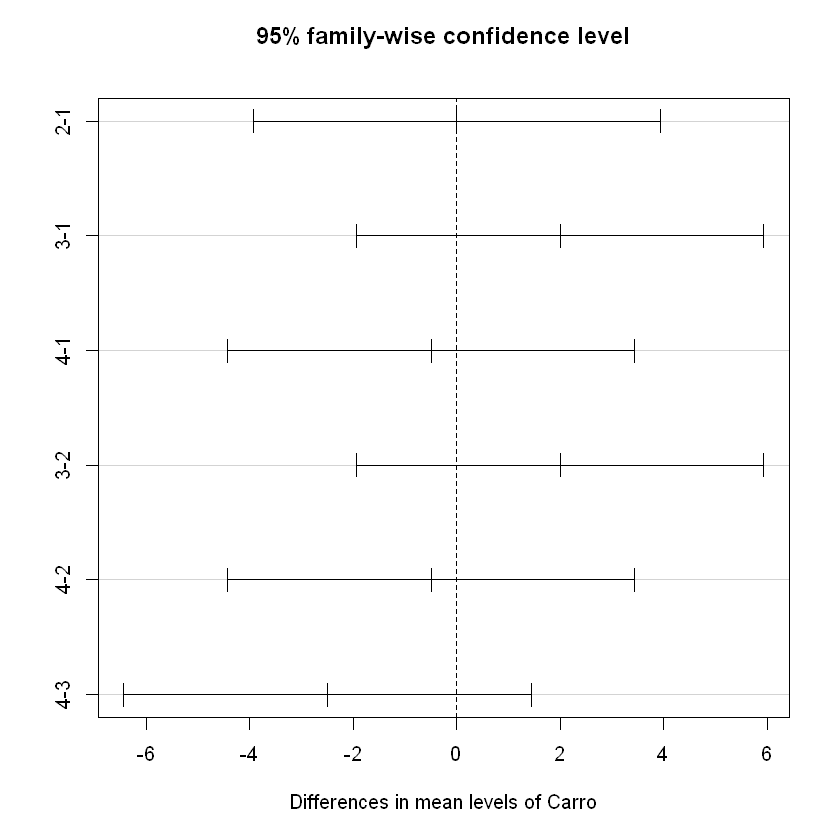

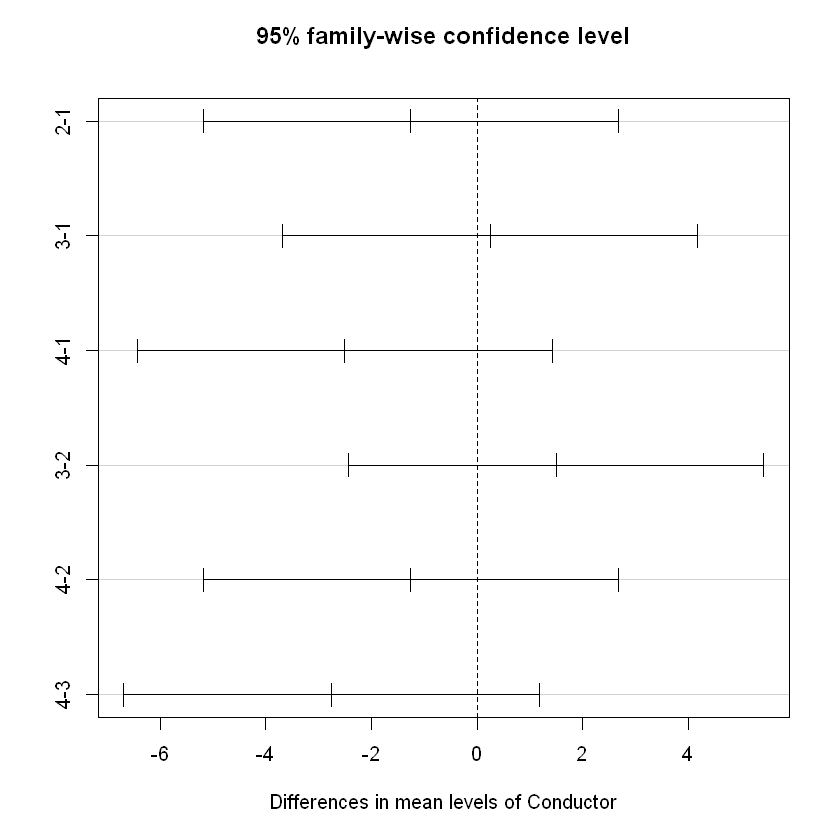

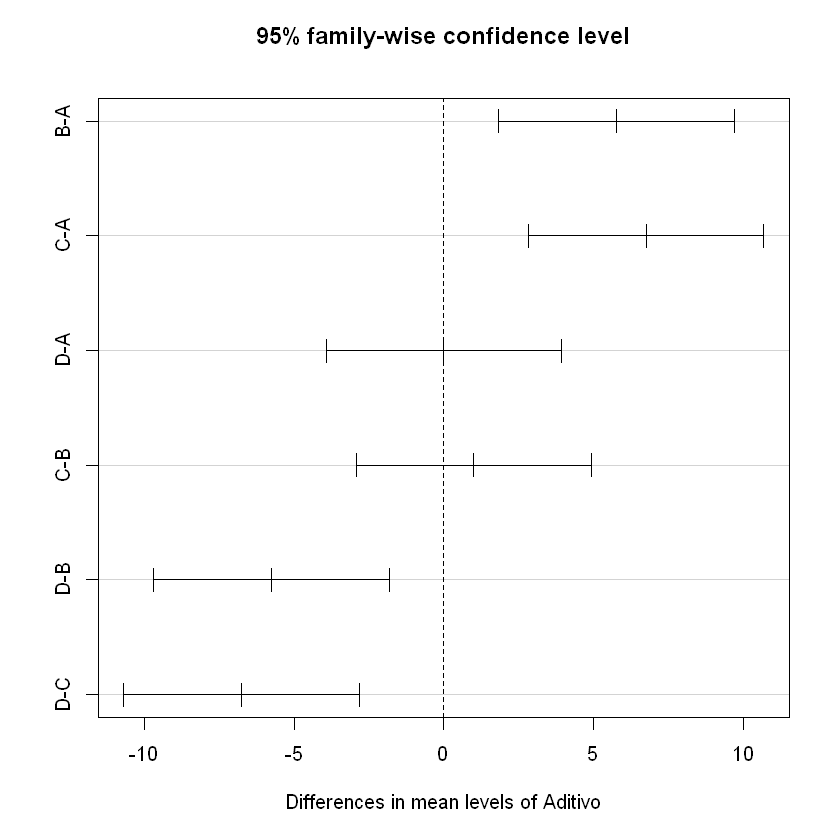

In [49]:
#Gráfica de medias
plot(TukeyHSD(model4))

Estos mismos resultados pueden observarse de forma más sencilla en la gráfica de las medias, en la cual solo los pares de  aditivo B-A, C-A, D-B Y D-C no son interceptados por la línea.